In [11]:
import pandas as pd

In [12]:
# Try reading the file with 'Shift_JIS' encoding
df_shiftjis_1 = pd.read_csv('..//data//在庫推移_9月1週目.csv', encoding='Shift_JIS')
# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
df_shiftjis_2 = pd.read_csv('..//data//在庫推移_9月2週目.csv', encoding='Shift_JIS')
df_shiftjis_3 = pd.read_csv('..//data//在庫推移_9月3週目.csv', encoding='Shift_JIS')
df_shiftjis_4 = pd.read_csv('..//data//在庫推移_9月4週目.csv', encoding='Shift_JIS')

#1時間ごとにまとめる

# Combine the old and new data
df_shiftjis = pd.concat([df_shiftjis_1, df_shiftjis_2, df_shiftjis_3, df_shiftjis_4], ignore_index=True)

# Display the first few rows of the DataFrame
df_shiftjis.head()

with open('..//data//在庫推移9月.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    df_shiftjis.to_csv(f)

In [13]:
import numpy as np

# Get unique product numbers
unique_product_numbers = df_shiftjis['品番'].unique()

# Compute histograms for each product number again
histograms = {}

for product in unique_product_numbers:
    product_data = df_shiftjis[df_shiftjis['品番'] == product]['在庫数（箱）']
    hist, bins = np.histogram(product_data, bins=range(0, int(product_data.max()) + 2))
    histograms[product] = (hist, bins)

# Display histograms for the first few products
list(histograms.items())[:5]

[('019120LC030    ',
  (array([  0,   0,   0,   0,   0,   0,   0,   3,  25,  59,  84,  66,  69,
          117,  45,  10,   2]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
          17]))),
 ('019120LC040    ', (array([ 0, 25, 28, 78, 26]), array([0, 1, 2, 3, 4, 5]))),
 ('019120LC050    ',
  (array([  0,   0,   0,  32,  77, 225, 146]),
   array([0, 1, 2, 3, 4, 5, 6, 7]))),
 ('019120LC060    ',
  (array([  0,   0,   0,   0,   0,   0,   2,  80, 172, 166,  50,   7,   3]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))),
 ('019120LC070    ',
  (array([  0,   0,   0,   0,   0,   0,  12,  99, 210, 128,  31]),
   array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])))]

In [14]:
# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
df_design = pd.read_csv('../data/設計値変更後_202309_手配数_1Y_2次.csv', encoding='Shift_JIS')
# Display the first few rows of the DataFrame
df_design.head()

,品番,加工図符号,設変符号,品名,ステータス,発注区分,整備室,整備室名,手配区分,工程内外製,...,21(木).1,22(金).1,23(土).1,24(日).1,25(月).1,26(火).1,27(水).1,28(木).1,29(金).1,30(土).1
0,35300-ECB010,35300ECB010,NaN,"PUMP ASSY, OIL W/MOTOR",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,877,815,0,0,877,877,822,878,822,0
1,35580-6GA020,355806GA020,A,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,0,0,0,0,0,0,0,0,0,0
2,35580-ECB011,35580ECB011,B,"ACTUATOR ASSY, SHIFT CONTROL",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,378,360,0,0,384,384,355,379,354,0
3,1040 052 001Z,1040052001Z,D,"PLUG, W/HEAD STRAIGHT SCREW",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,499,455,0,0,493,493,467,499,468,0
4,1040 183 011P,1040183011P,C,"BOLT, FLANGE",使用中,かんばん,1Y,第１工場,手配,Ｐ,...,"1,134","1,080",0,0,"1,152","1,152","1,065","1,137","1,062",0


In [15]:
# Load the new CSV file into a DataFrame with 'Shift_JIS' encoding
df_pitch = pd.read_csv('../data/不等ピッチ情報.csv', encoding='Shift_JIS')
# Display the first few rows of the DataFrame
df_pitch.head()

,Unnamed: 0,仕入先\nコード,工区,仕入先名,発送場所名,受入,納入先,最長便ピッチ時間h:mm,"最長便ピッチを\n""分""へ変換",納入回数,等ピッチ時間分,不等ピッチ時間分,1日1回納入省く分,不等ピッチ係数日
0,700201,7002,1,矢崎総業（株）,NaN,1Y,カリツー西尾東経由,0.000000,0,1,1150.0,-1150.0,0.0,0.00
1,428702,4287,2,日本精工（株）,三河分室,1Y,カリツー西尾東経由,0.166667,240,8,143.8,96.2,96.2,0.09
2,323601,3236,1,中庸スプリング（株）,NaN,1Y,カリツー西尾東経由,0.479167,690,2,575.0,115.0,115.0,0.10
3,81601,816,1,大橋鉄工（株）,NaN,1Y,カリツー西尾東経由,0.000000,0,1,1150.0,-1150.0,0.0,0.00
4,310201,3102,1,多摩川精機販売（株）,NaN,1Y,カリツー西尾東経由,0.000000,0,1,1150.0,-1150.0,0.0,0.00


In [16]:
longi = len(df_design.loc[:,"品番"])
longj = len(df_pitch.loc[:,"仕入先名"])

for i in range(longi):
    for j in range(longj):
        if (df_design.loc[i, '仕入先名/工場名'] == df_pitch.loc[j,'仕入先名']):
            #print(df_design.loc[i, '仕入先名/工場名'],df_pitch.loc[j,'仕入先名']
            df_design.loc[i,"不等ピッチ"] = df_pitch.loc[j,"不等ピッチ係数日"]

In [24]:
# Calculate the minimum inventory for each product number
min_inventory = df_shiftjis.groupby('品番')['在庫数（箱）'].min().reset_index()

# 品番ごとに在庫状態の割合を計算
df_merge = pd.DataFrame()

count = 0

for i in range(len(min_inventory.iloc[:,1])):
    hinban = min_inventory.loc[i,"品番"]
    hinban2 = hinban.replace("-", "") 
    hinban3 = hinban2.replace(" ", "") 
    for j in range(len(df_design.iloc[:,1])):
        tehaihinban = df_design.loc[j,'品番']
        tehaihinban2 = tehaihinban.replace('-', '')
        if hinban3 == tehaihinban2:
            df_merge.loc[count,'品番'] = hinban3
            df_merge.loc[count,'収容数'] = df_design.loc[j,'収容数']
            df_merge.loc[count,'品名'] = df_design.loc[j,'品名']
            #df_merge.loc[count,'品名'] = df_design.loc[j,''])
            # Calculate max and min values for each product number
            daily = (int(str(df_design.loc[j,'当月必要数']).replace(',', '')) / df_design.loc[j,'当月稼働日数'])
            A = df_design.loc[j,'サイクル間隔']
            B = df_design.loc[j,'サイクル回数']
            C = df_design.loc[j,'サイクル情報']
            #print(i,A,B,C,S,daily,min_inventory.loc[i,'在庫数（箱）'])
            S = int(str(df_design.loc[j,'収容数']).replace(',', ''))
            df_merge.loc[count,'最小値'] = 0.1 * ((daily/S)  * A * (1 + C) / B) 
            df_merge.loc[count,'B'] = B
            df_merge.loc[count,'最大値'] = df_merge.loc[count,'最小値'] + (daily / S)/B + (daily/S)*df_design.loc[j,'不等ピッチ']
            #print(df_merge['最大値'],df_merge['最大値'])
            count = count + 1

df_merge.head(150)

,品番,収容数,品名,最小値,B,最大値
0,019128GA010,50,"CAP, SHIPPING",3.326166,2.0,14.652335
1,01912ECB010,300,"CAP, SHIPPING",1.108484,2.0,4.883064
2,01912ECB040,50,"CAP, SHIPPING",4.473120,1.0,18.810043
3,01912ECB060,400,"CAP, SHIPPING",0.335014,1.0,1.123284
4,33490ECB010,4,"COOLER ASSY, OIL",24.008429,2.0,95.252952
...,...,...,...,...,...,...
145,9056455A038,100,SHIM,0.026197,1.0,0.177626
146,9056455A039,100,SHIM,0.056843,1.0,0.385414
147,9056455A040,100,SHIM,0.092020,1.0,0.623924
148,9056455A041,100,SHIM,0.085100,1.0,0.577004


/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


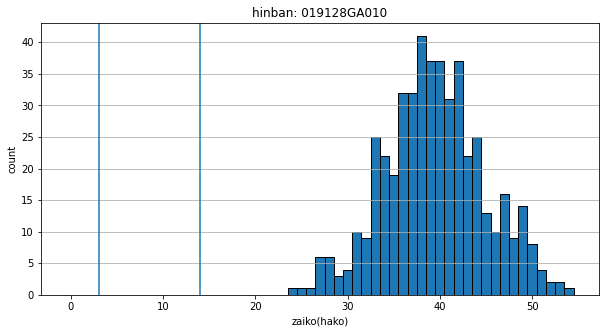

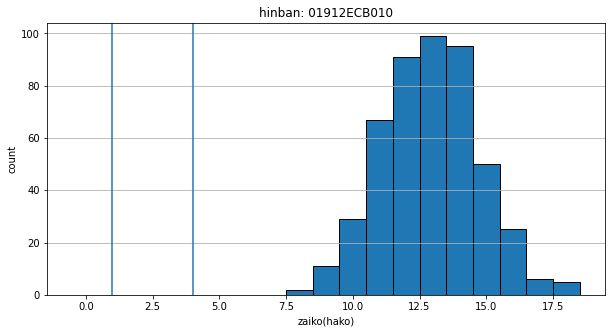

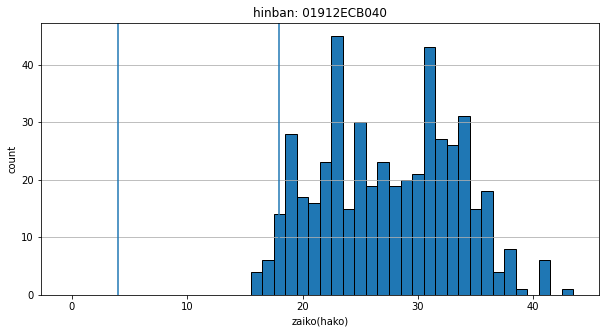

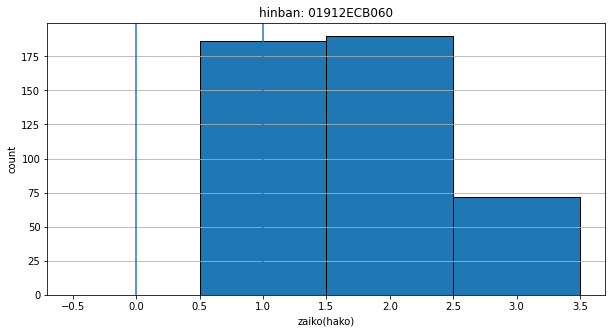

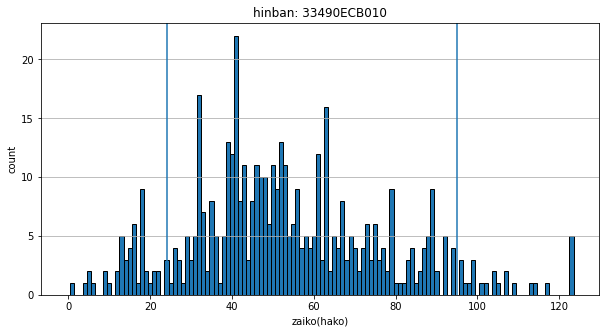

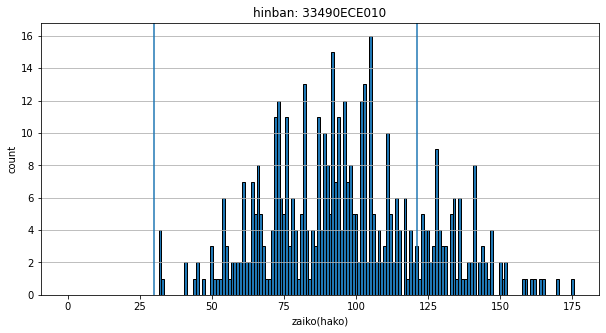

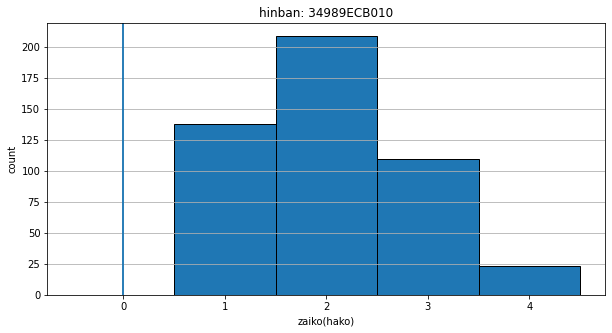

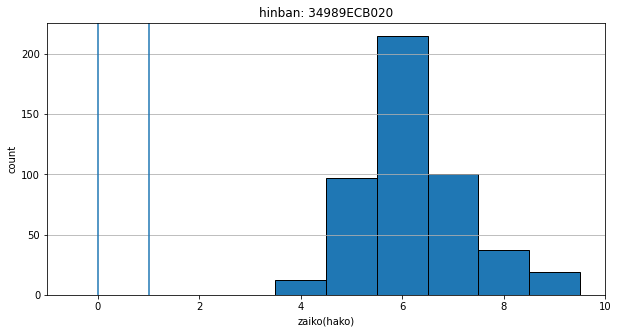

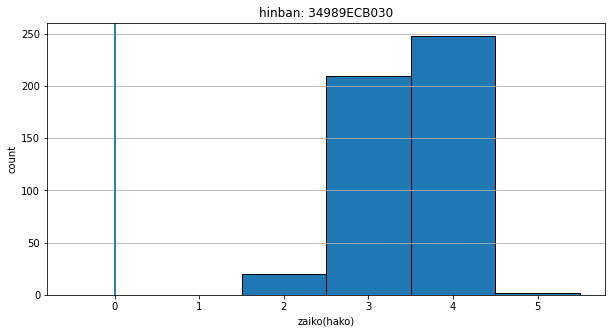

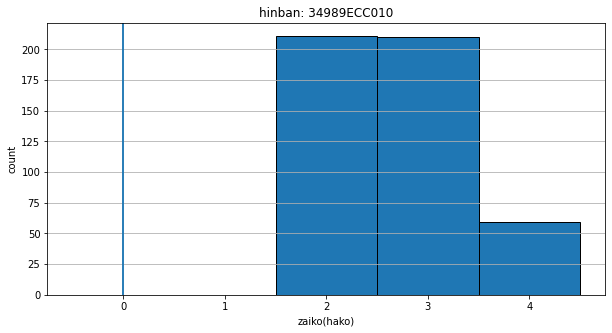

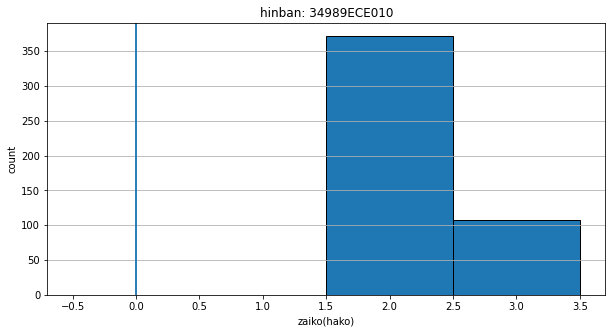

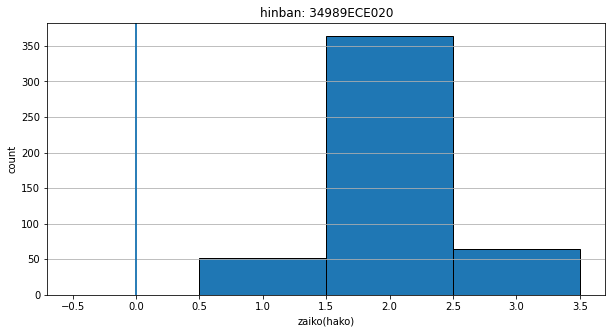

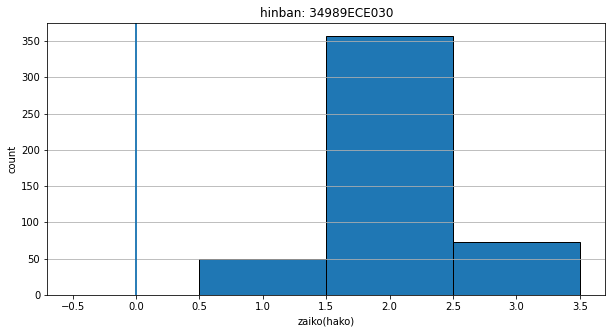

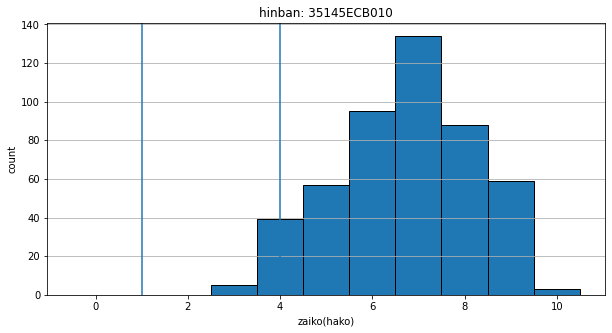

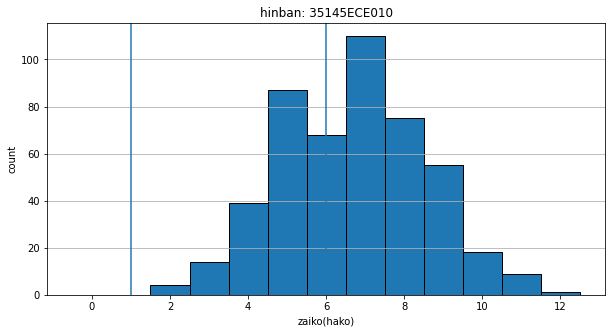

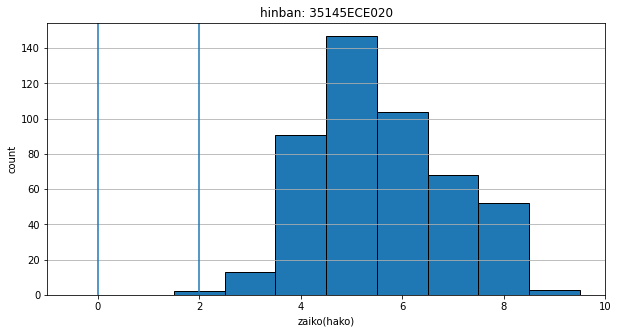

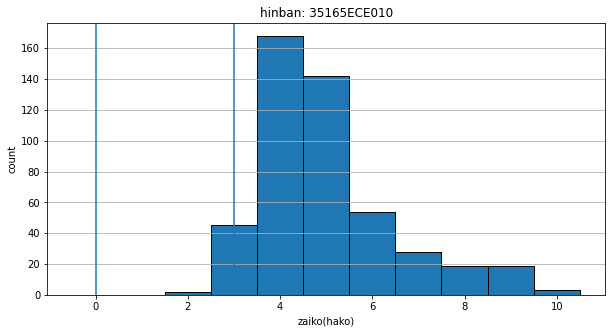

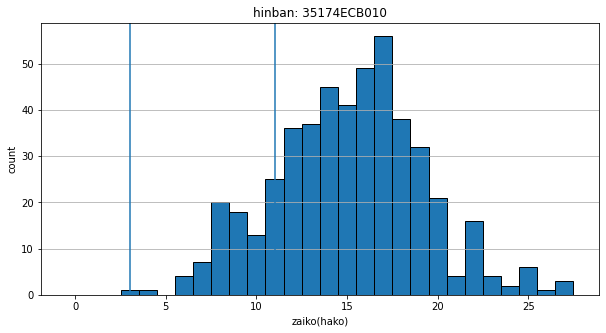

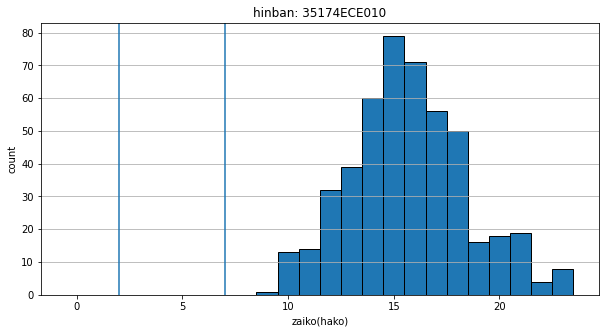

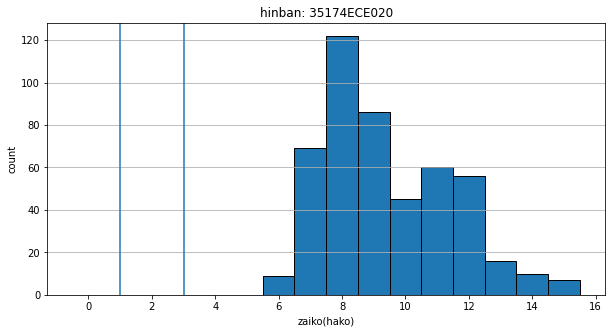

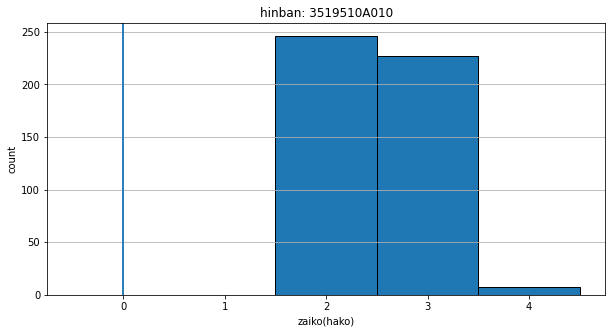

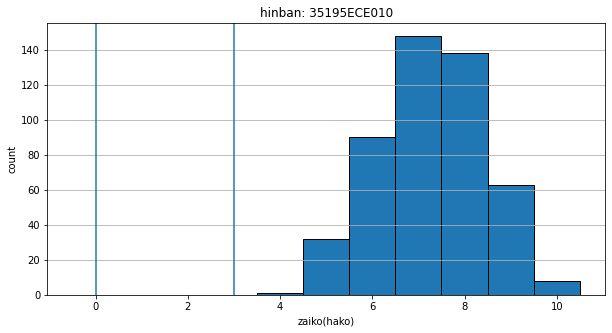

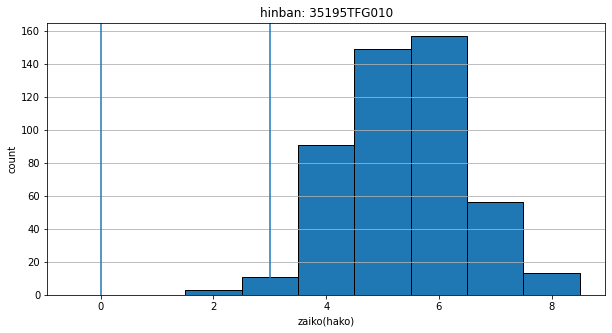

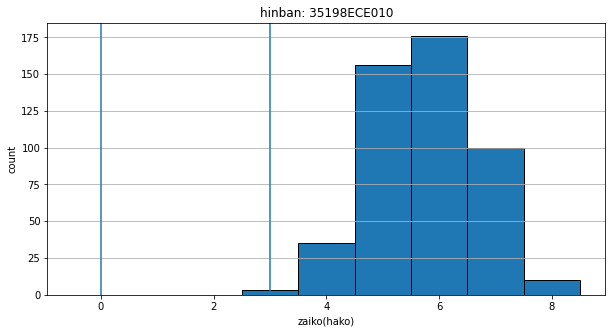

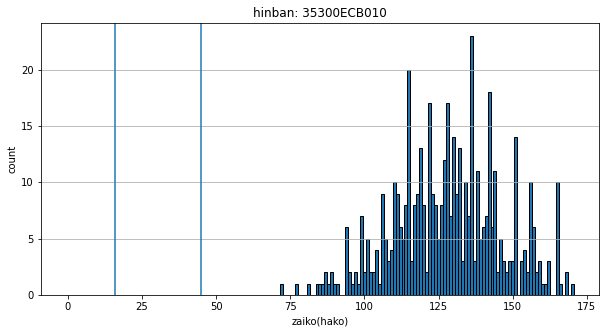

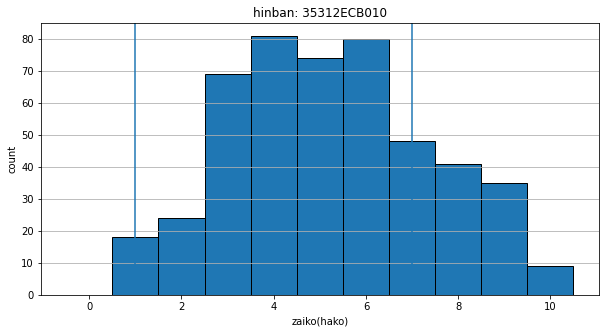

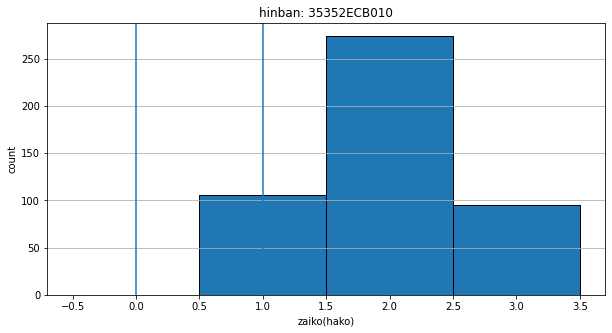

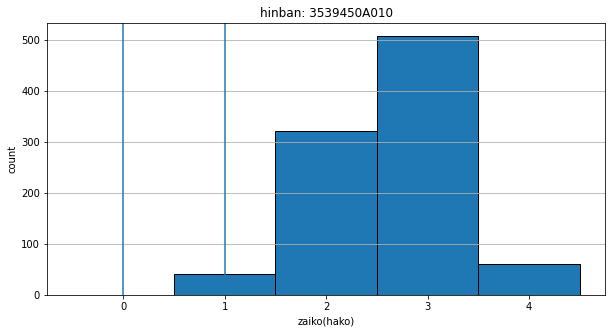

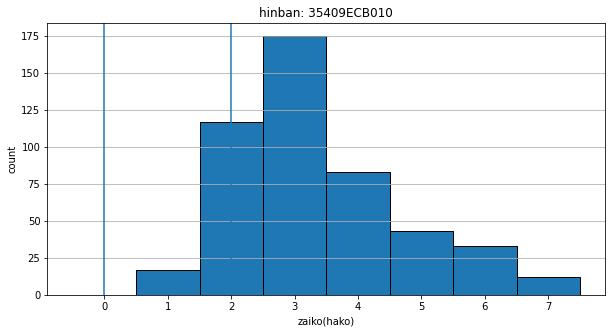

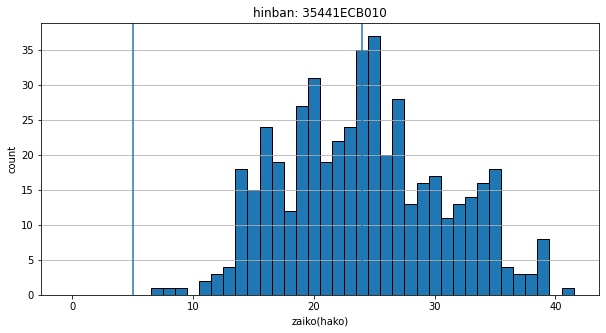

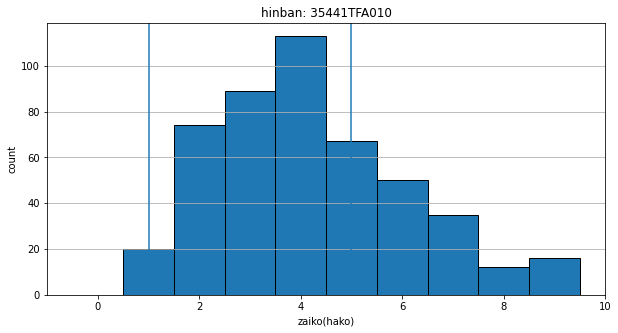

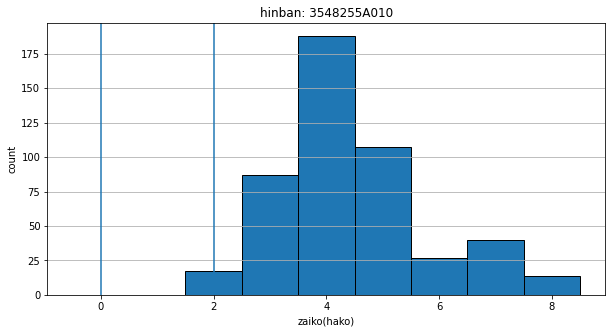

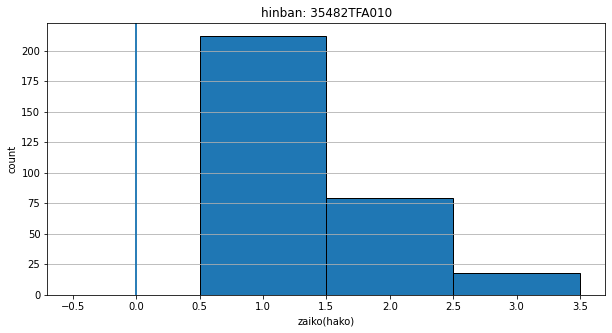

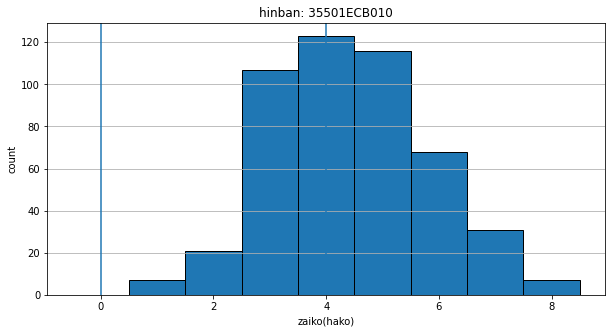

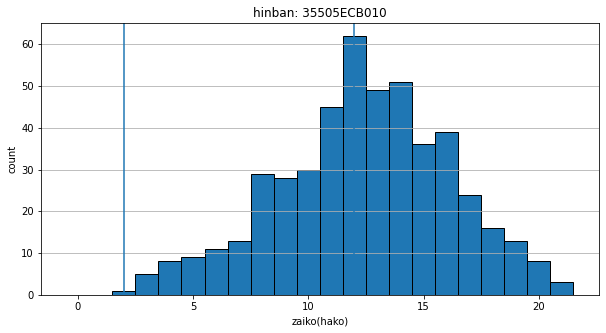

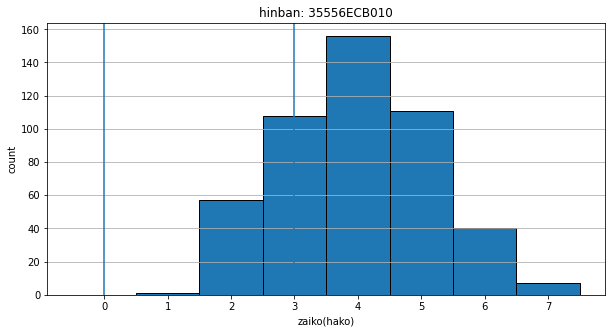

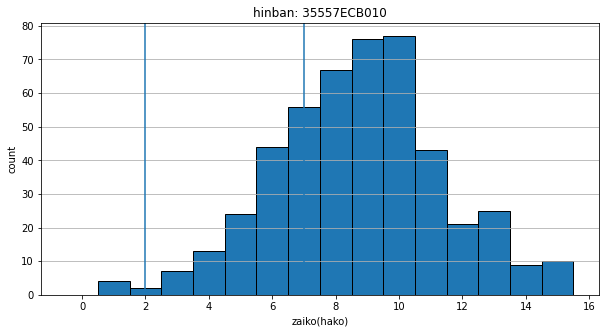

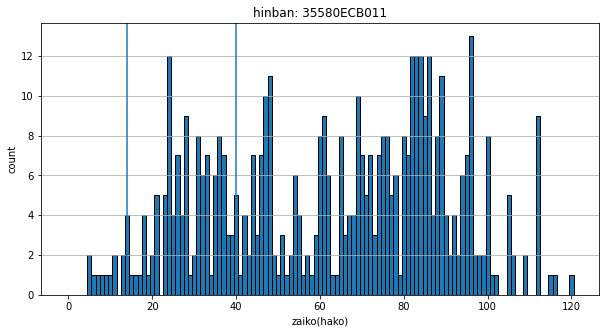

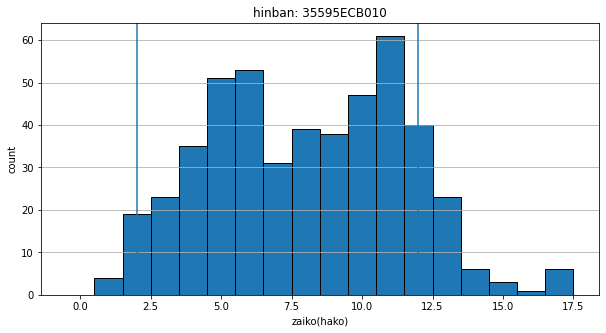

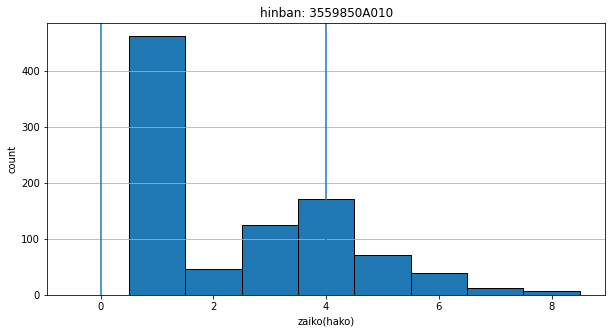

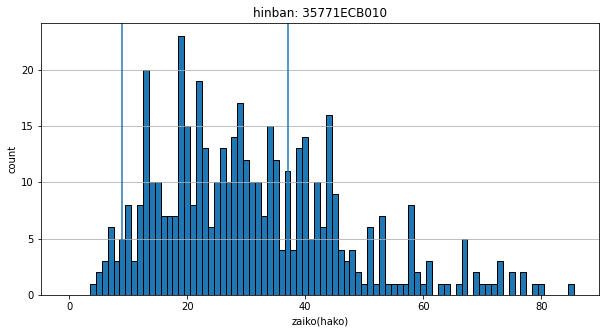

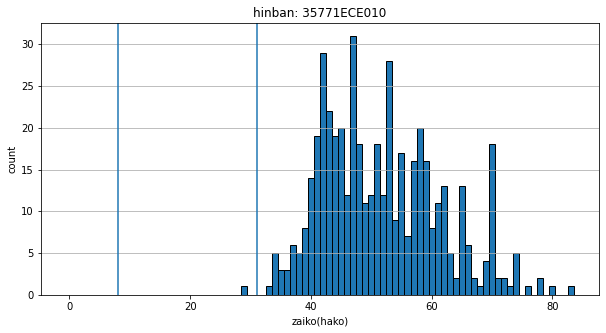

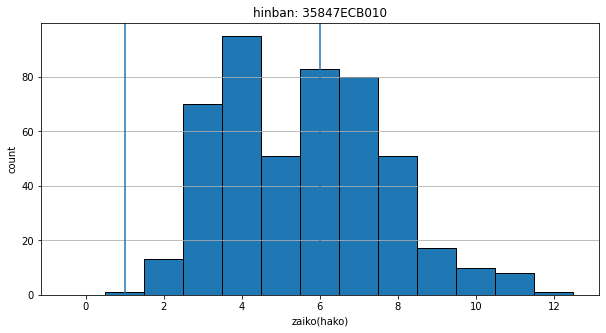

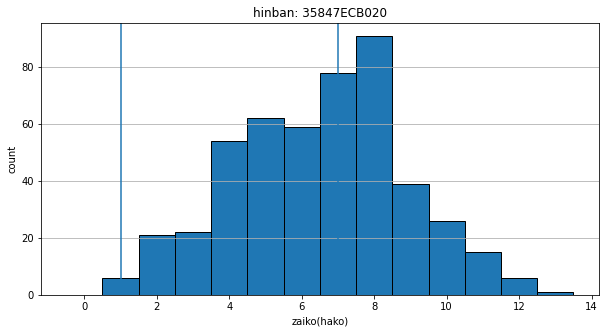

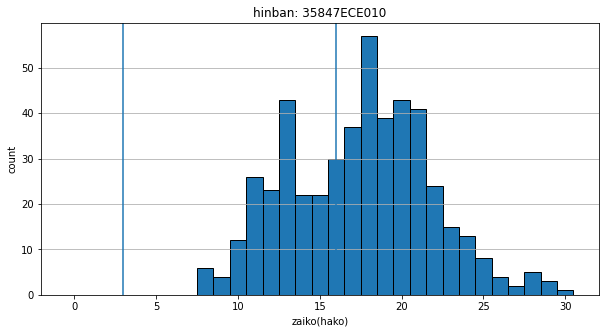

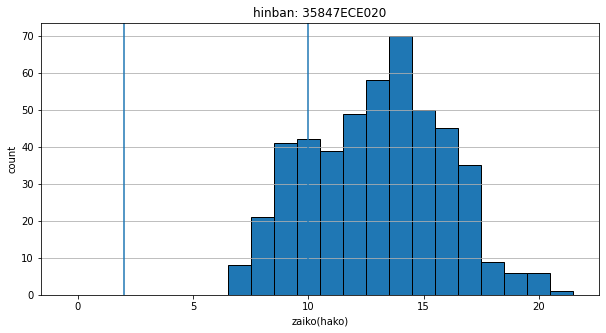

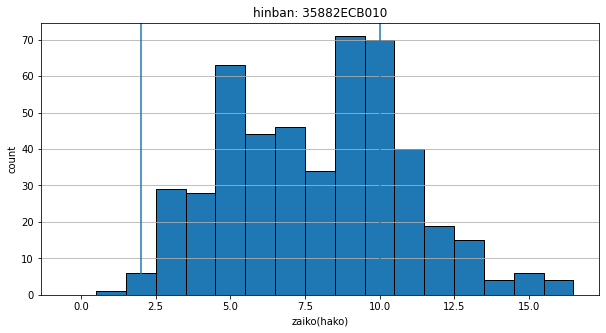

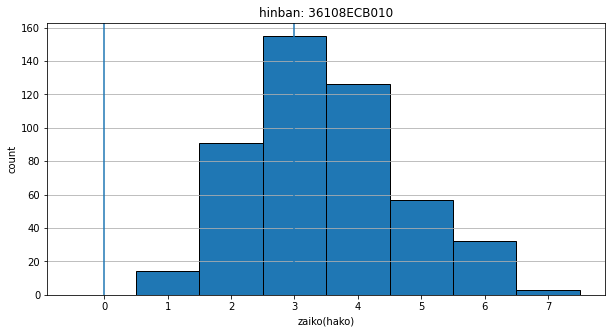

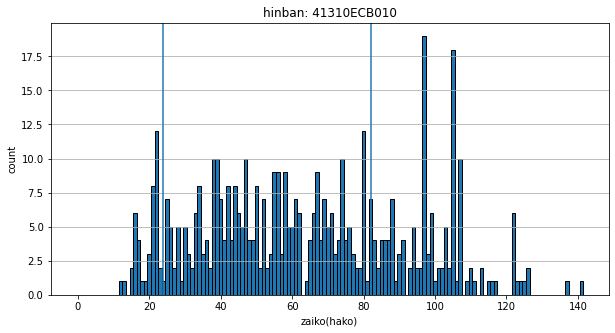

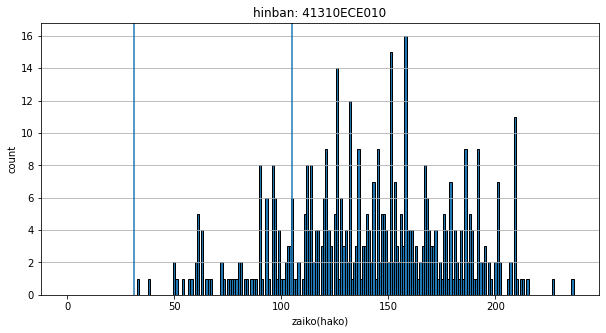

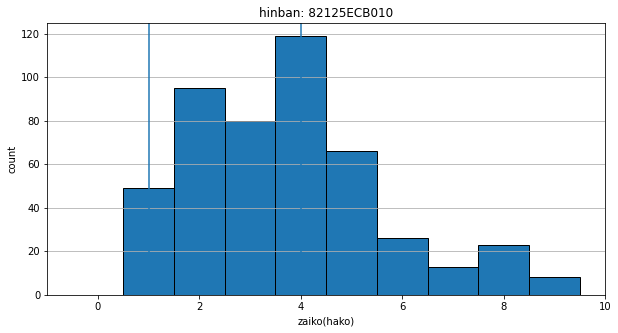

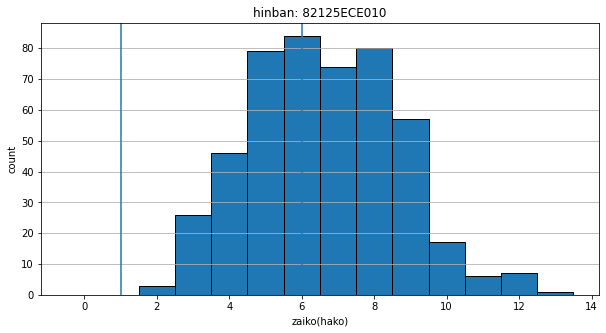

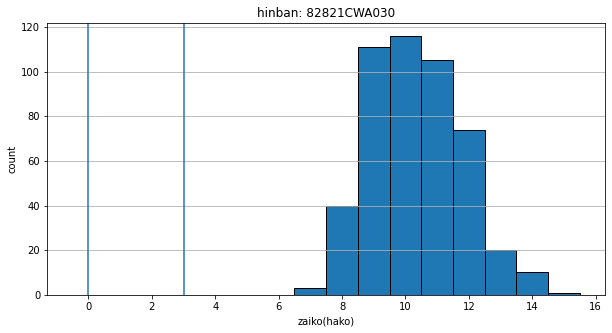

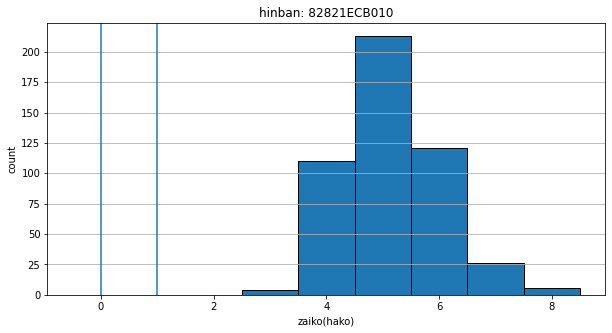

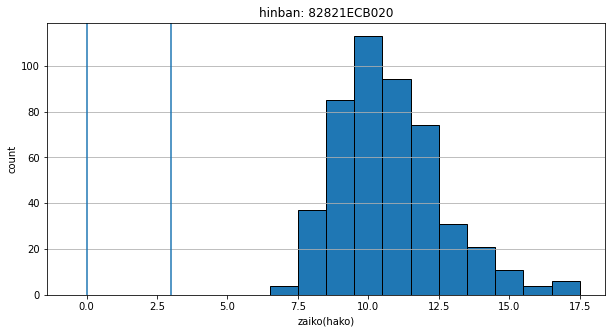

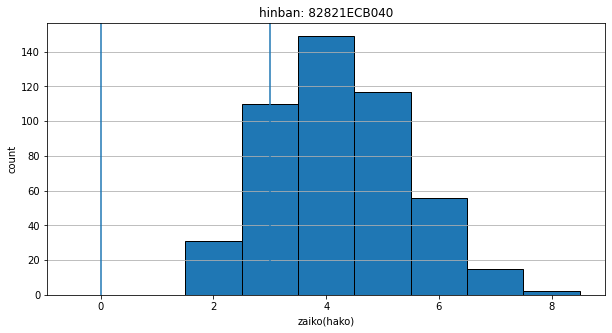

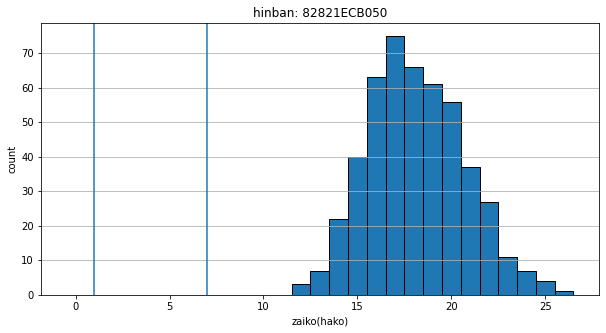

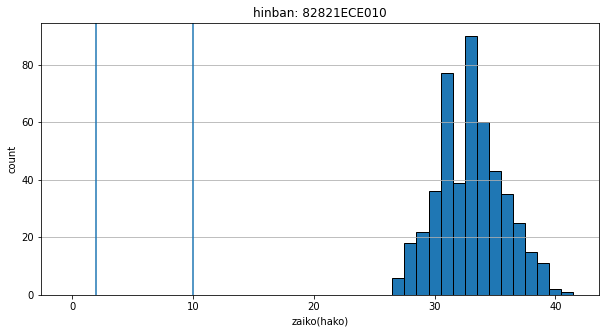

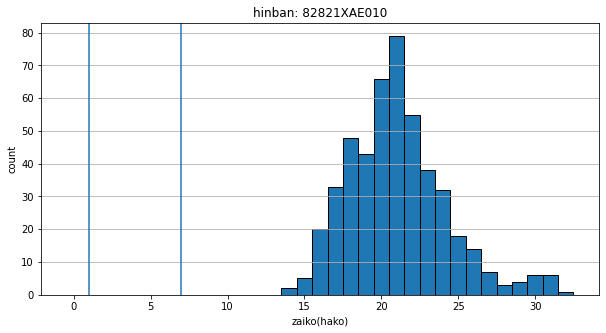

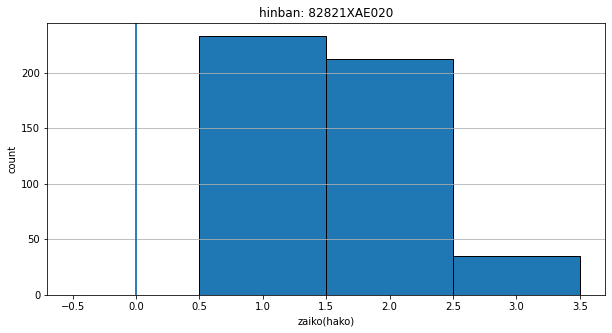

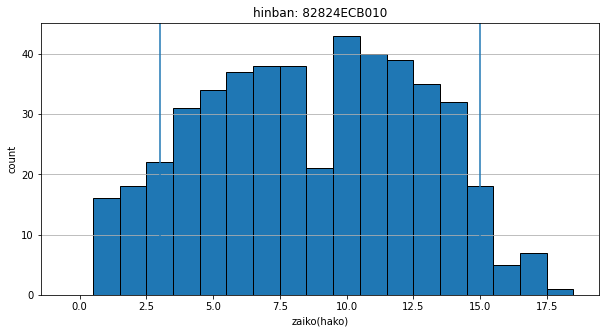

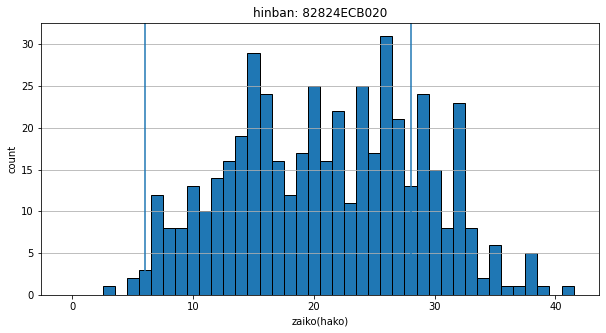

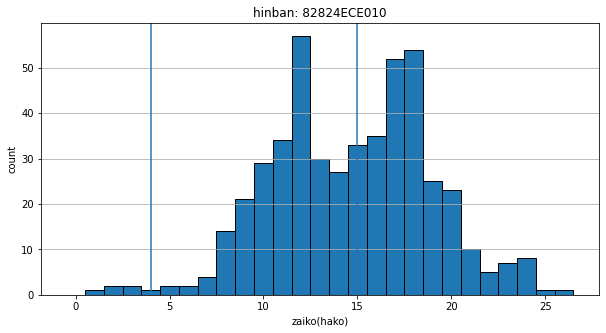

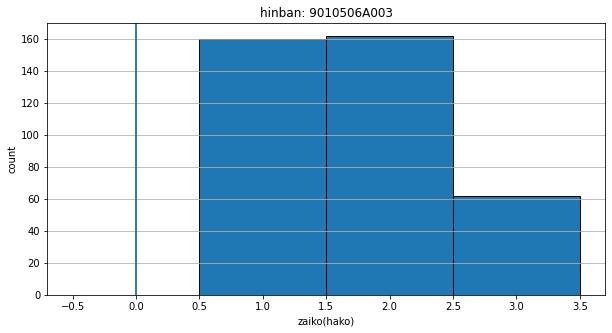

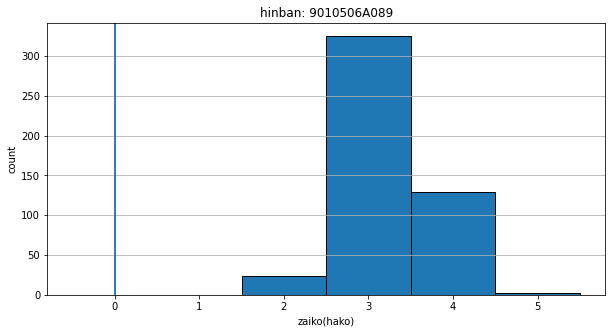

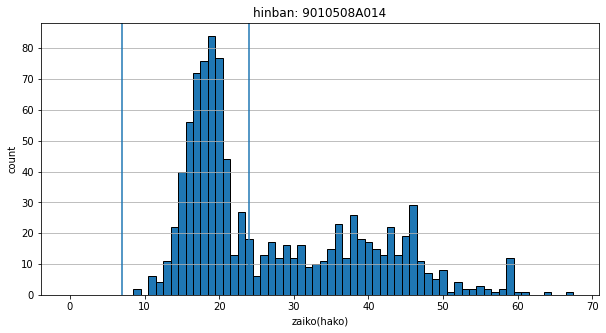

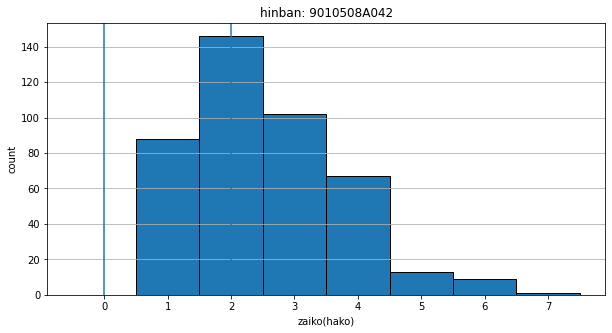

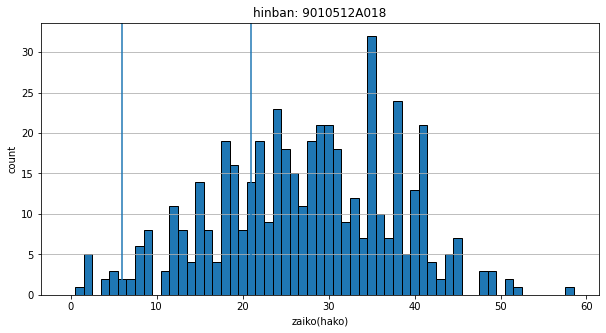

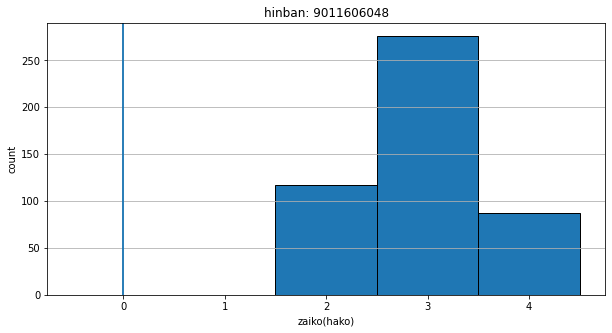

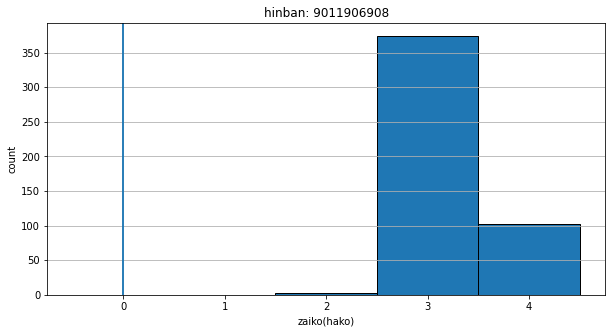

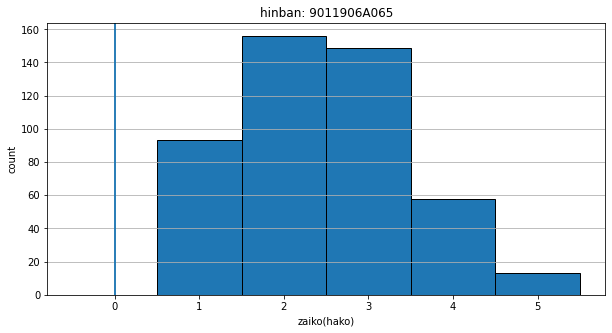

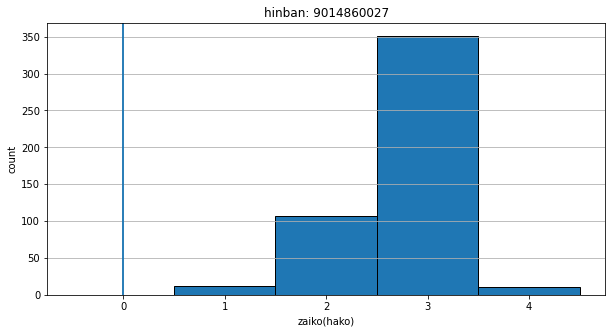

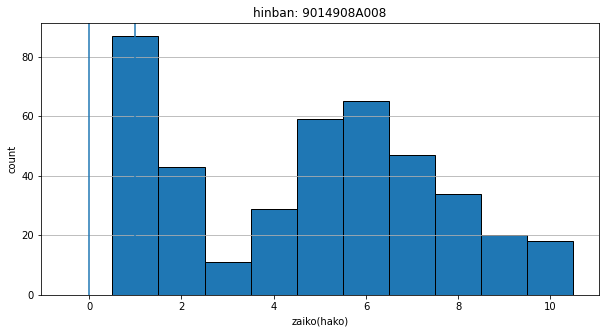

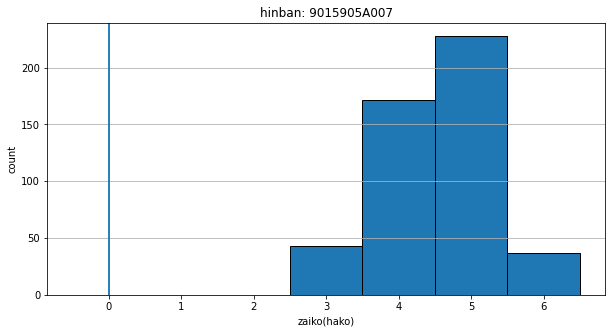

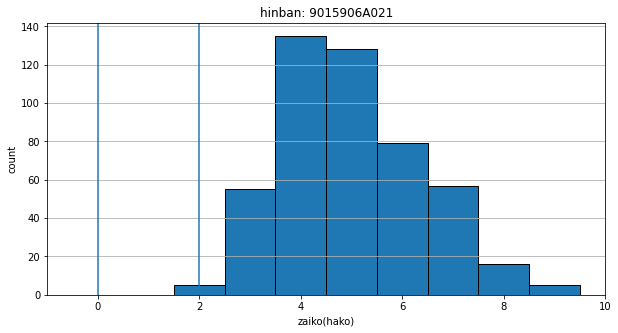

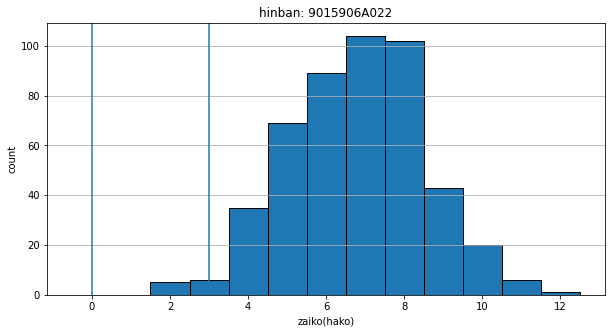

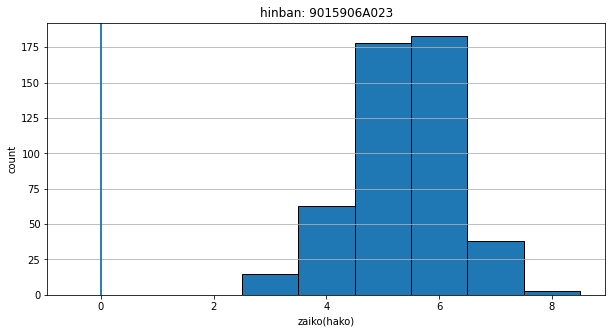

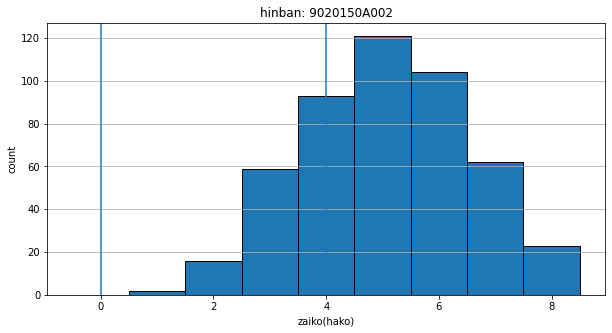

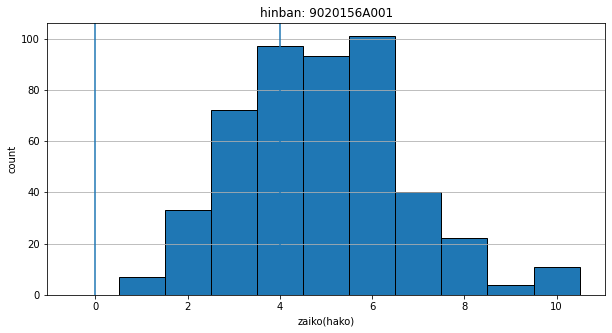

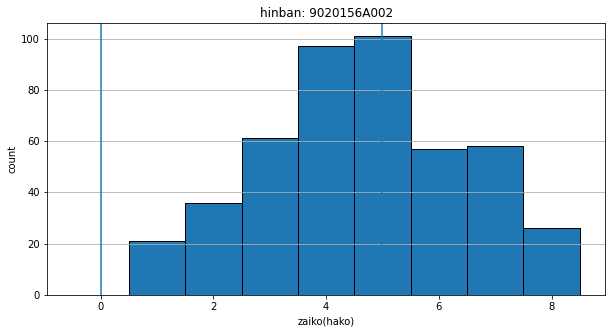

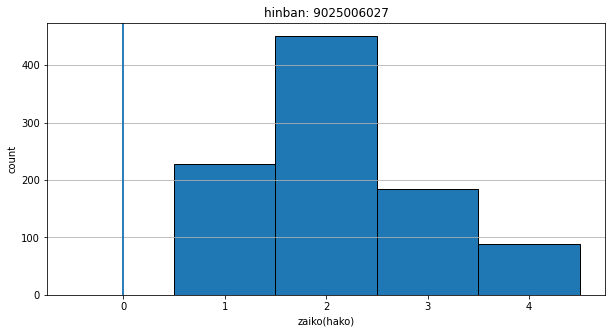

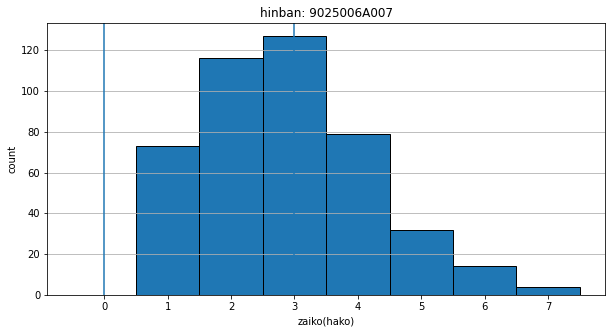

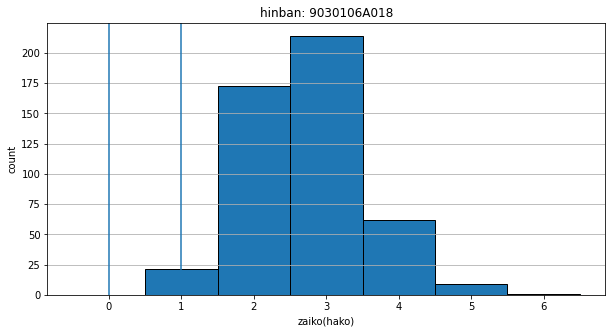

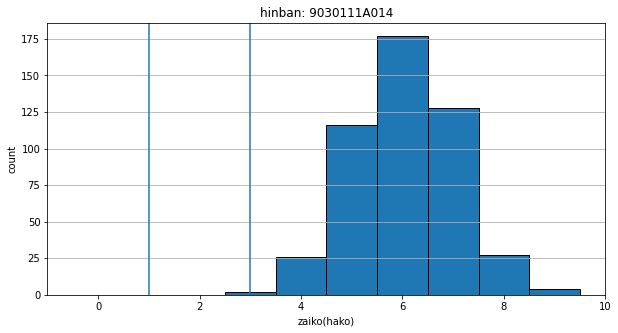

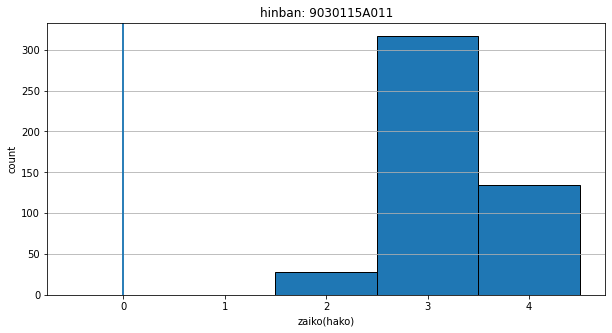

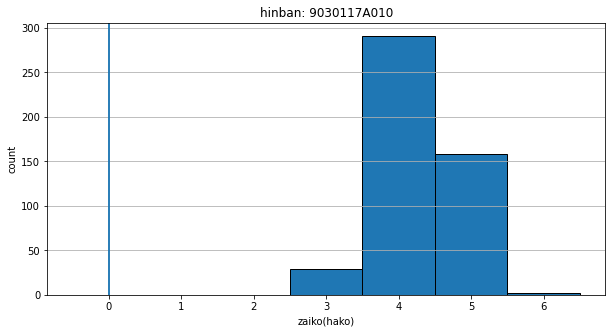

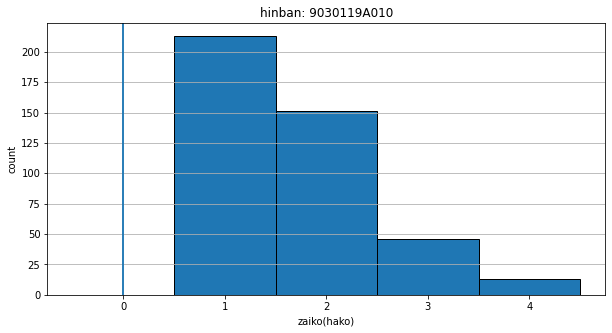

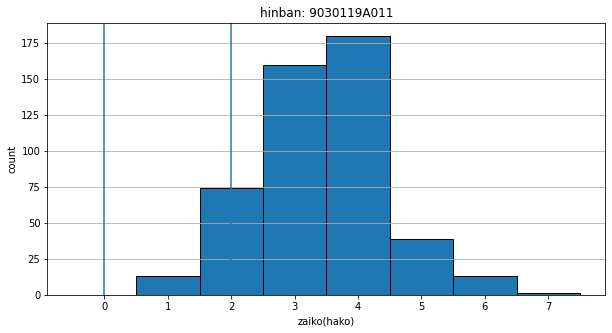

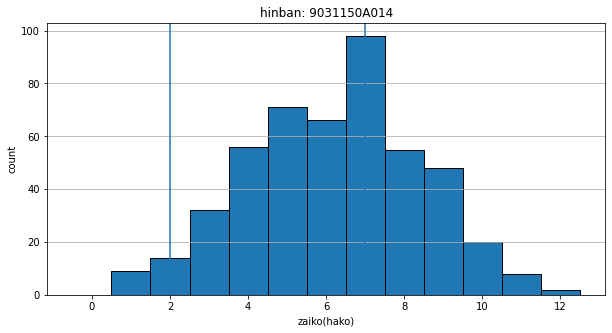

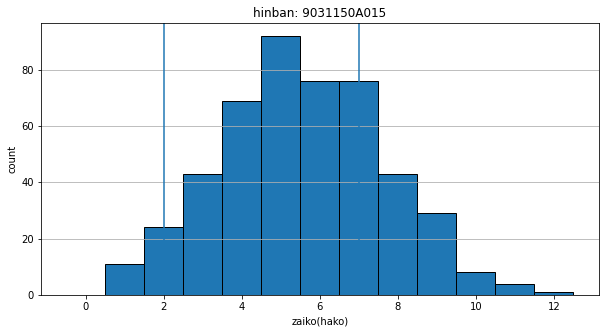

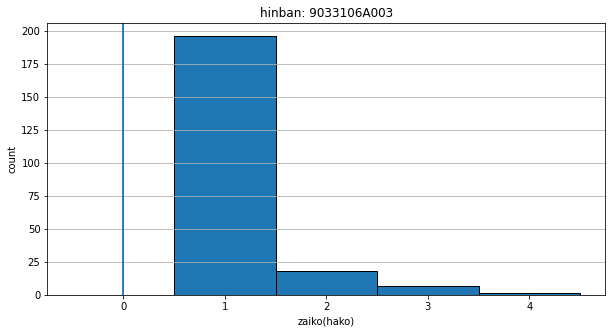

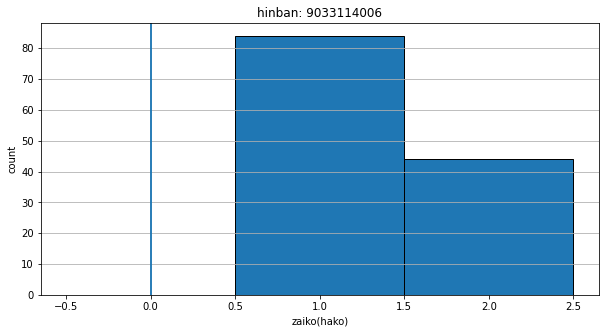

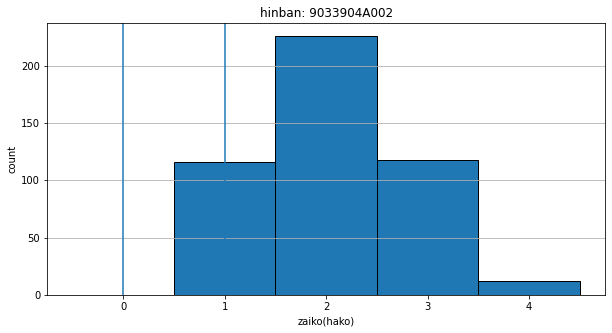

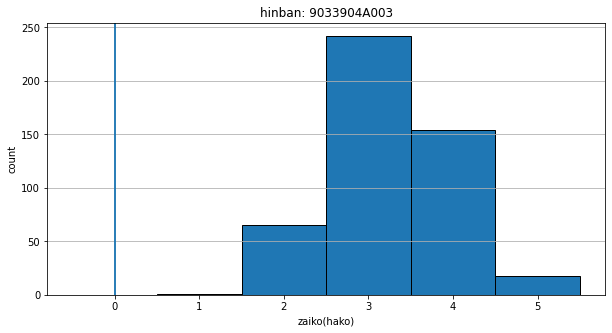

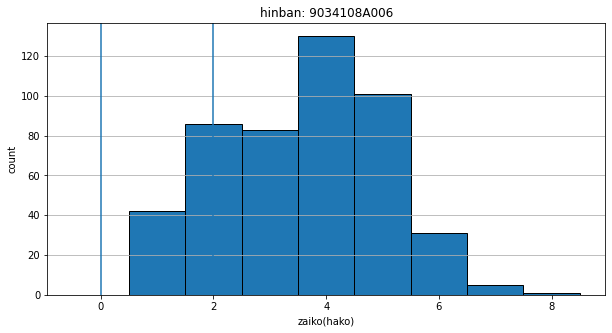

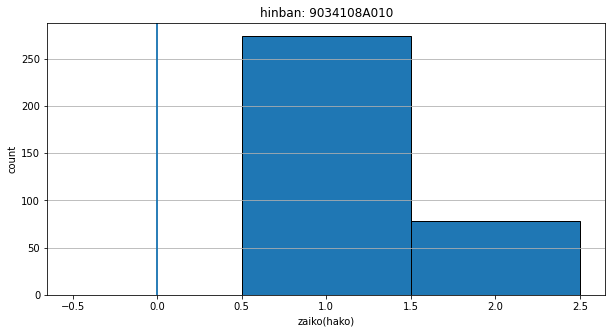

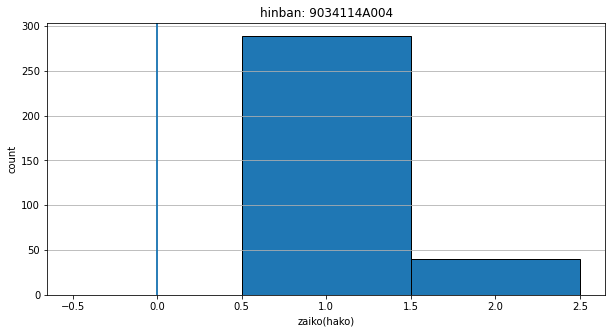

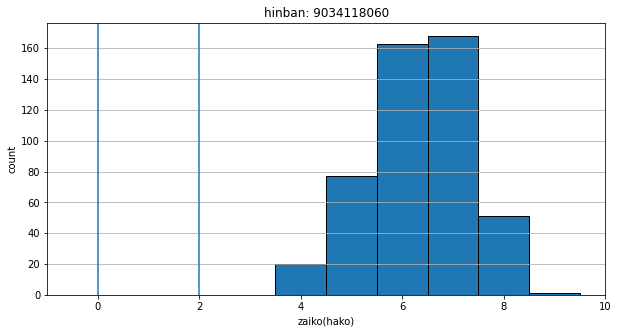

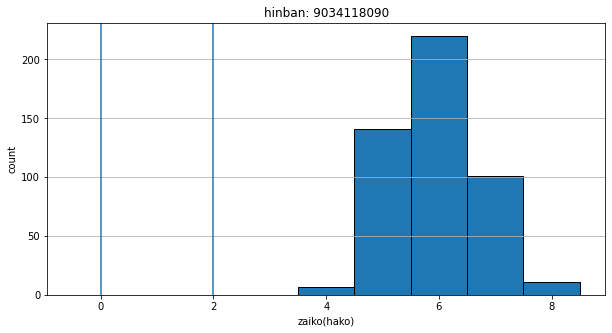

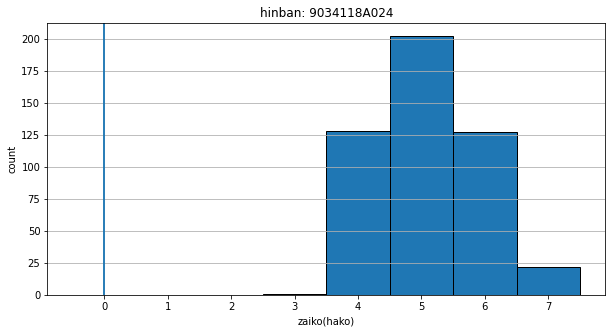

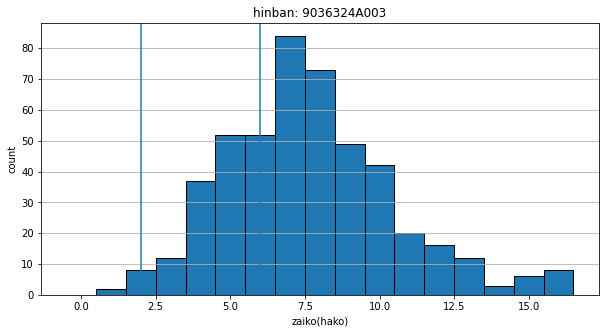

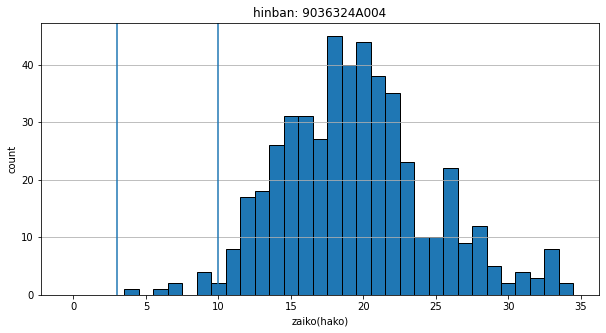

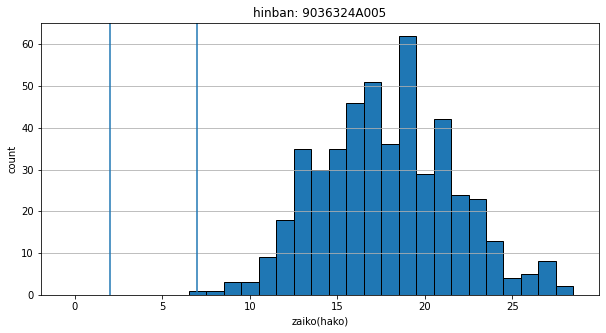

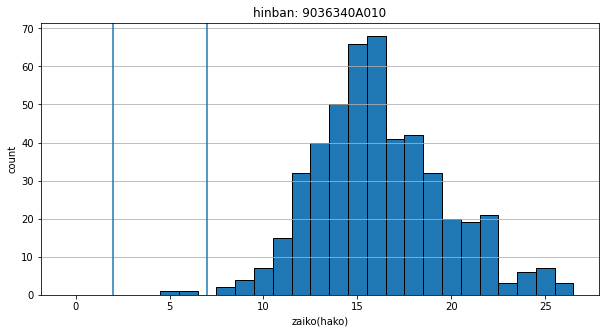

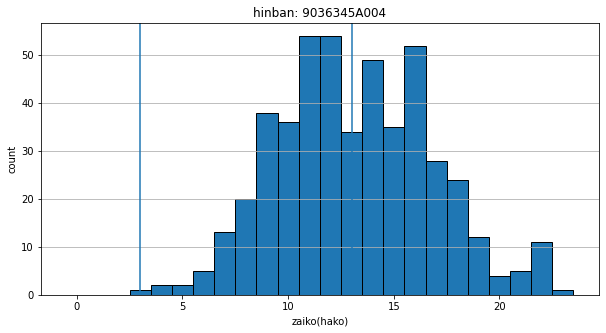

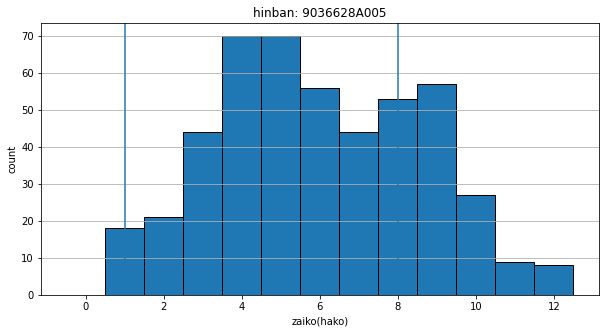

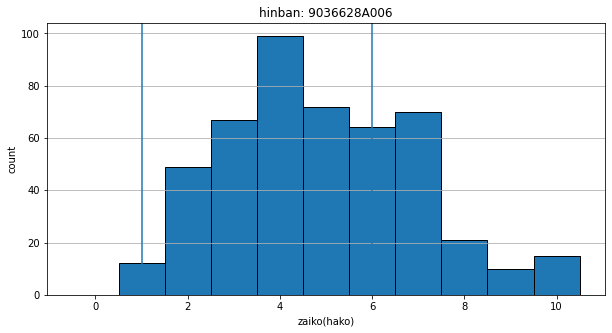

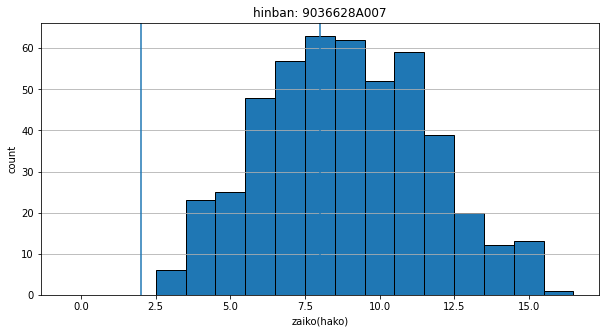

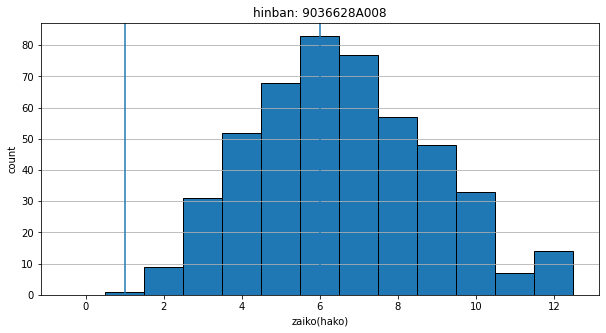

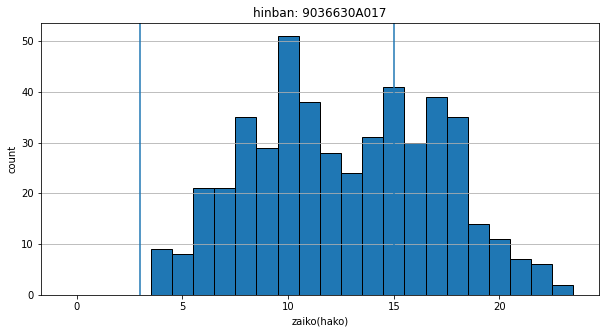

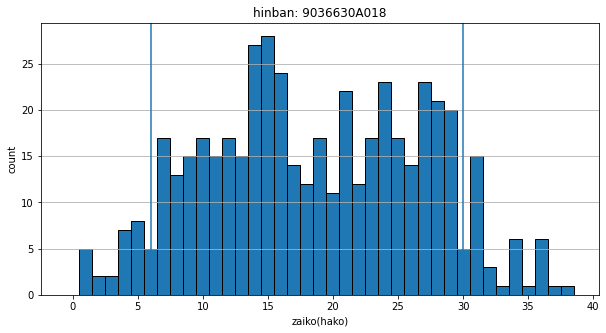

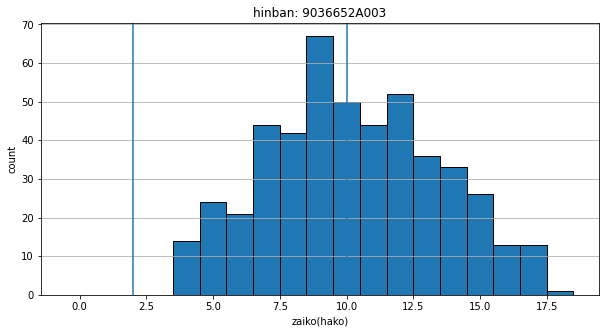

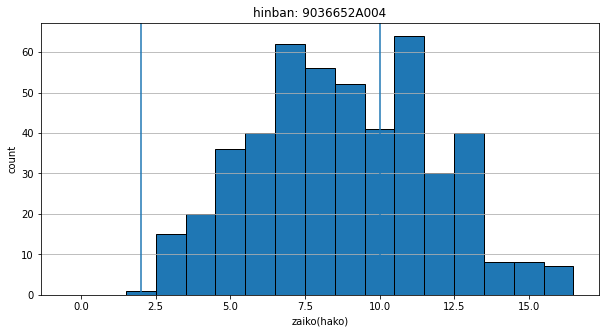

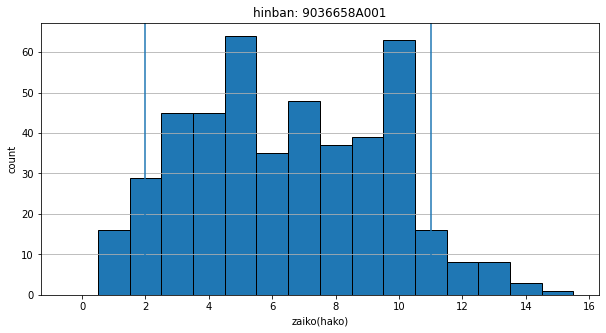

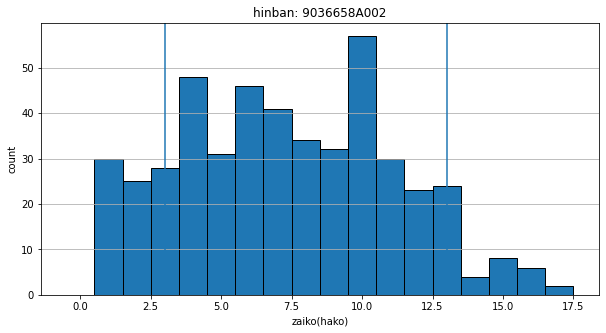

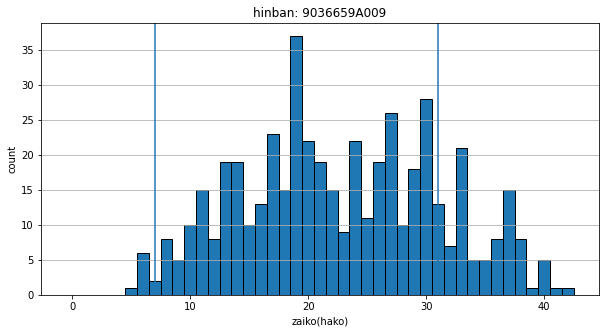

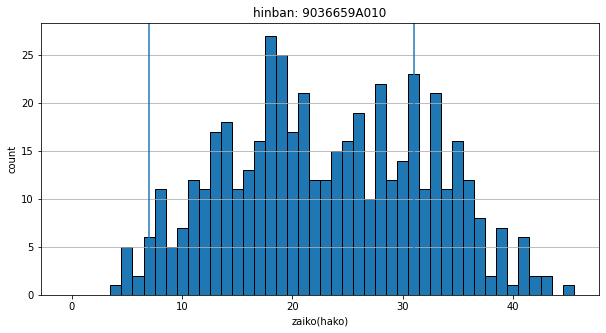

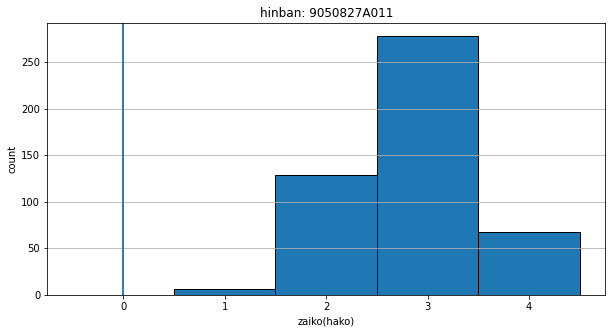

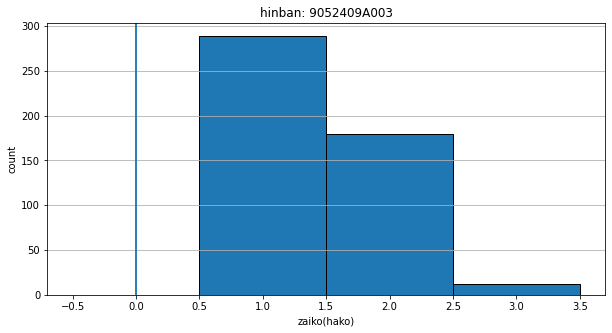

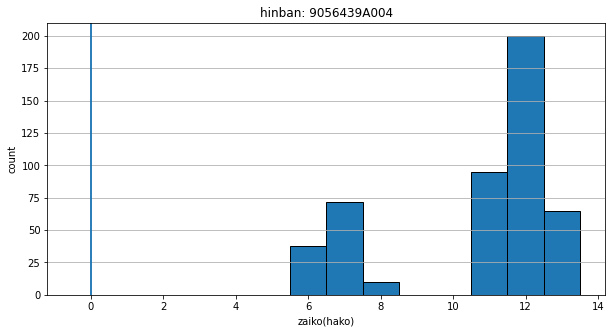

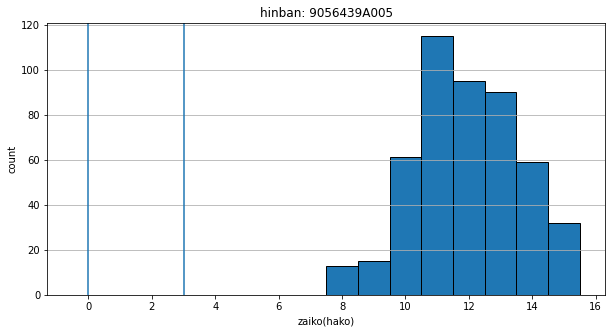

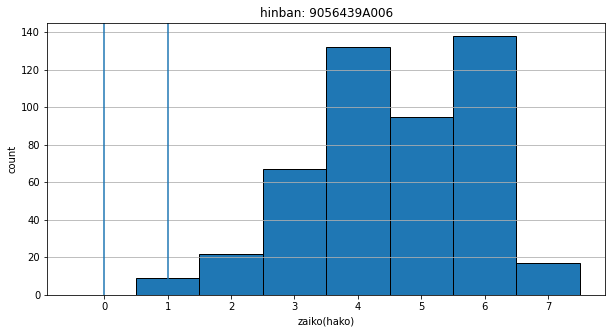

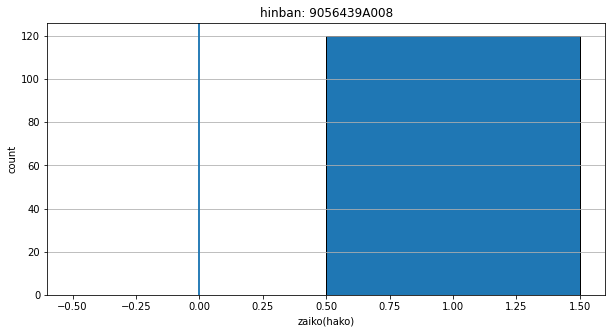

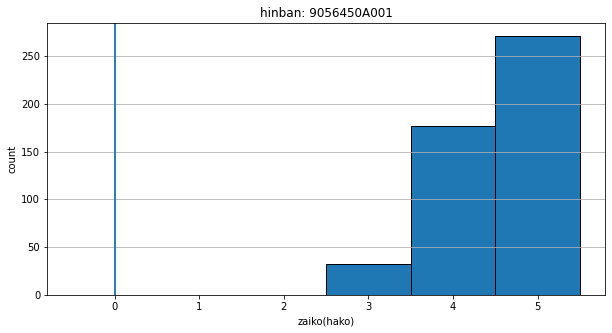

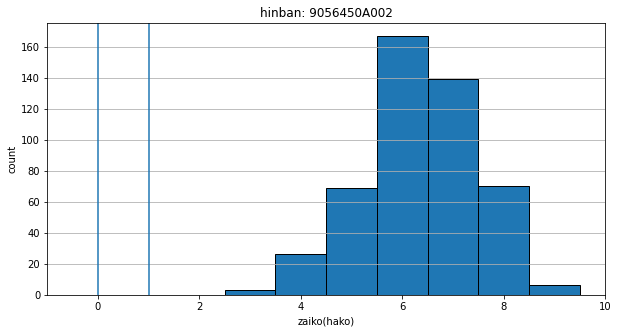

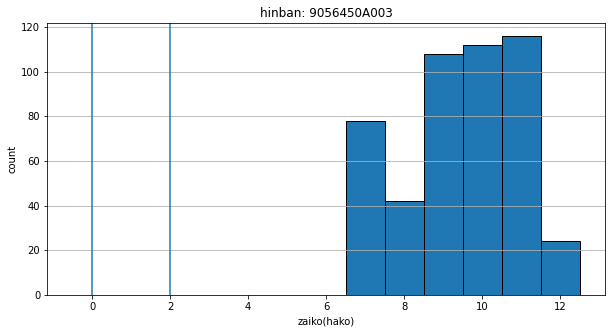

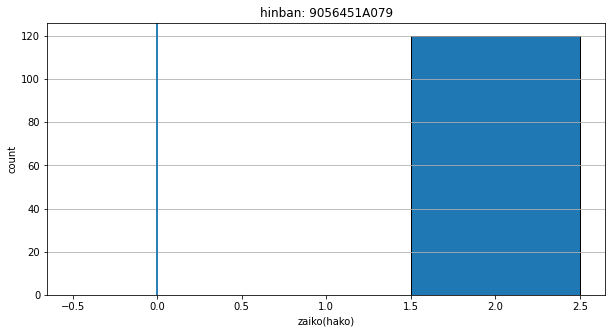

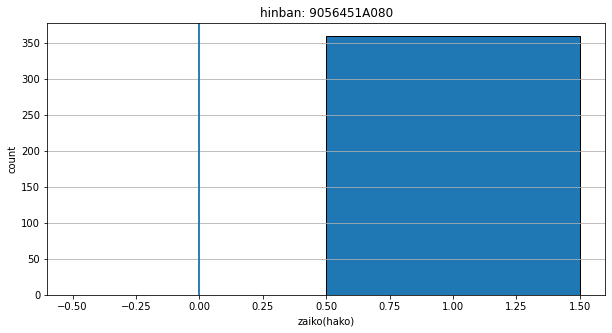

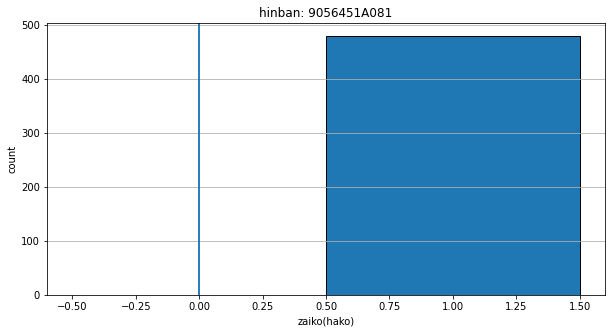

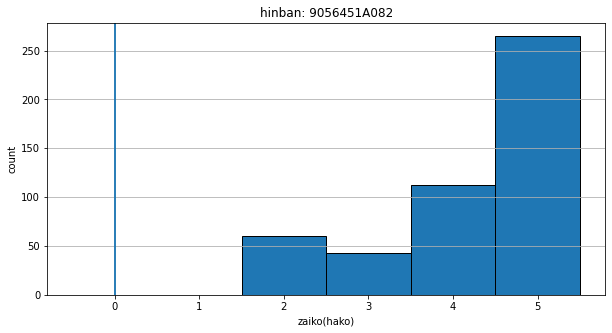

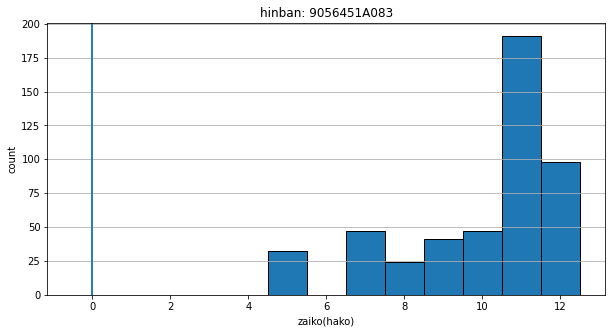

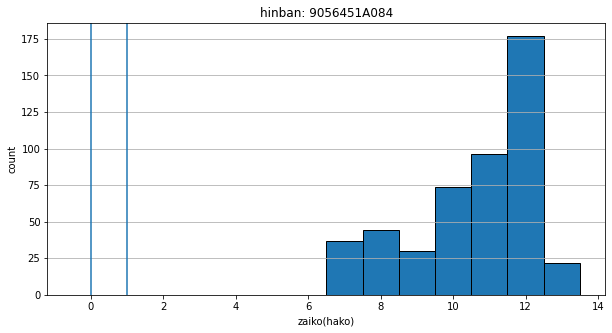

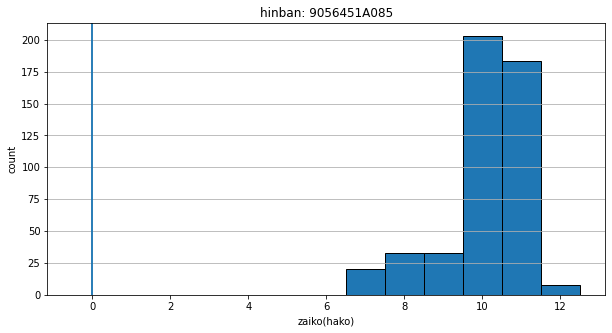

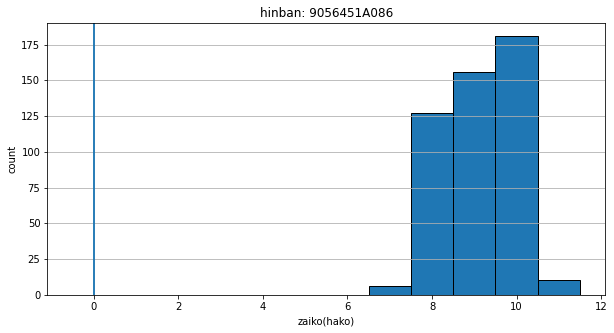

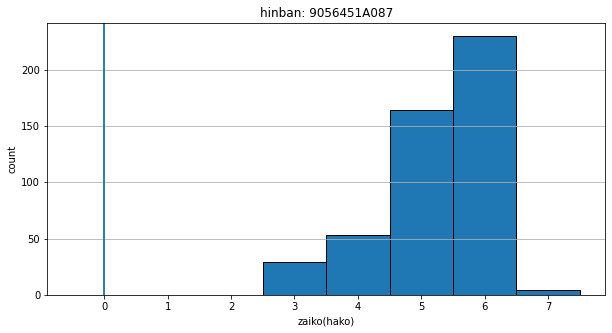

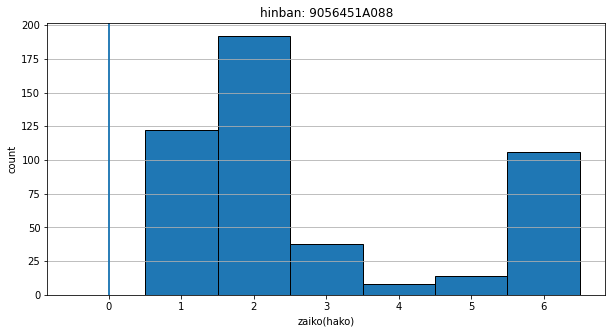

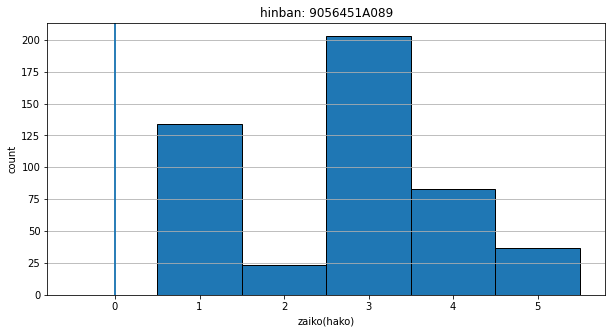

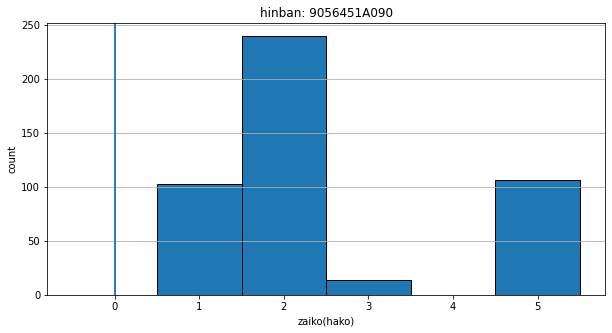

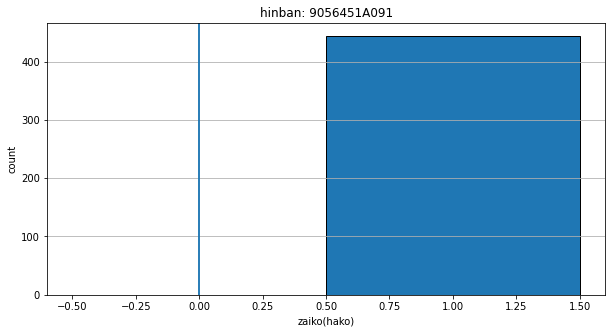

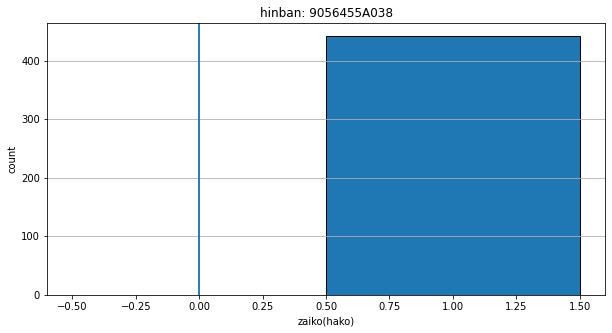

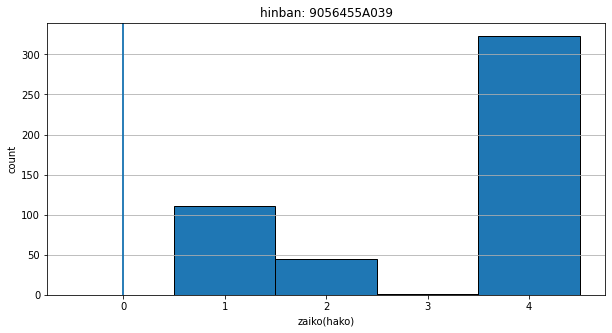

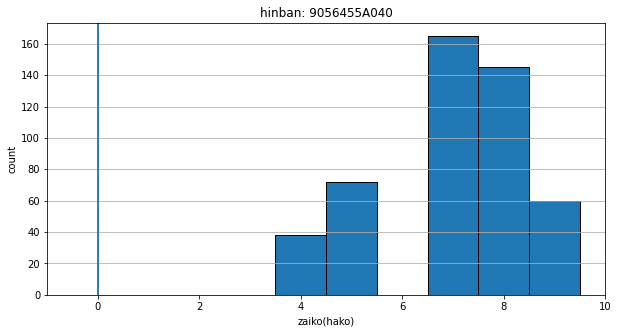

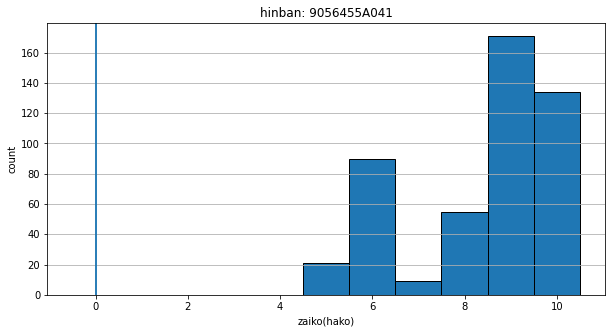

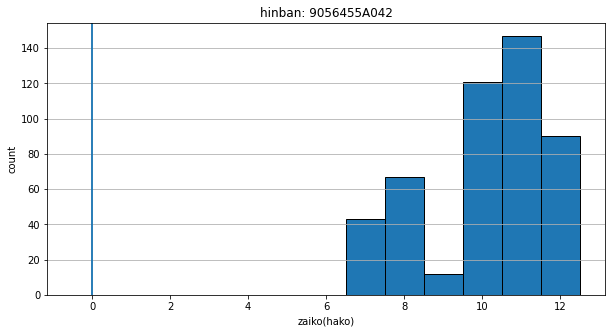

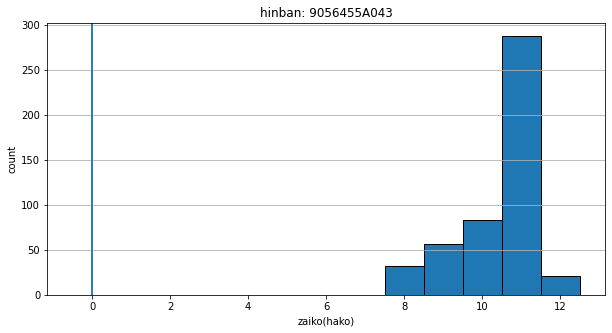

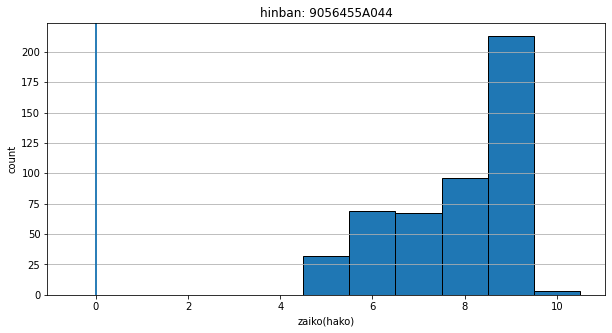

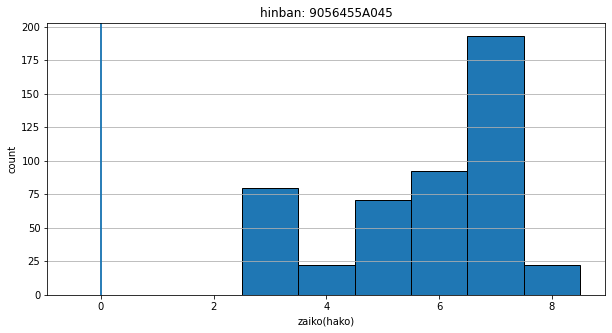

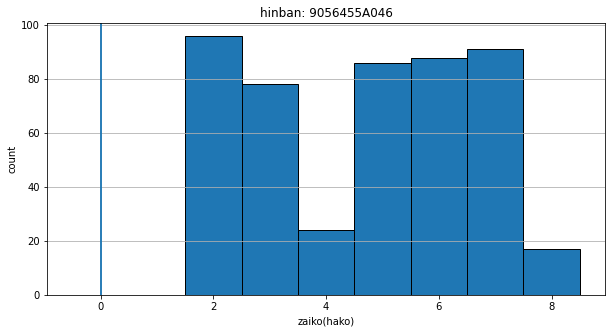

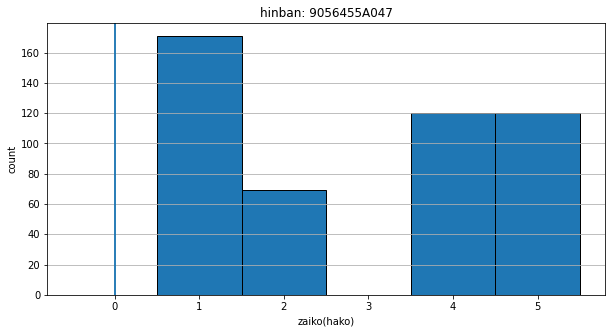

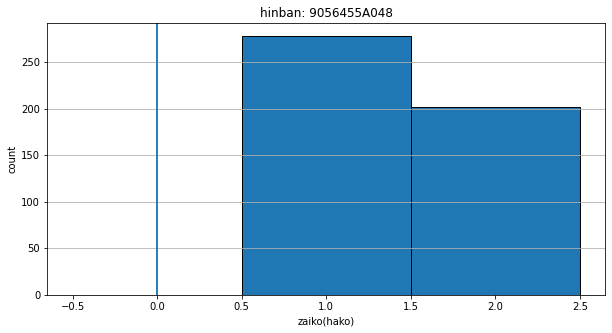

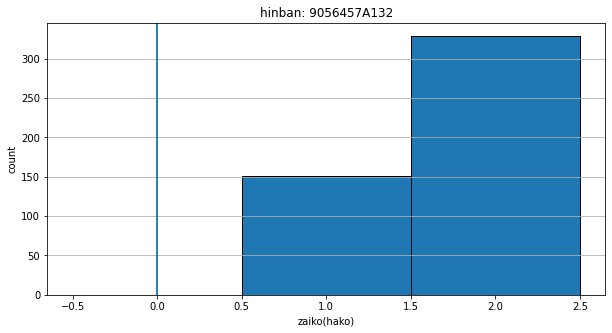

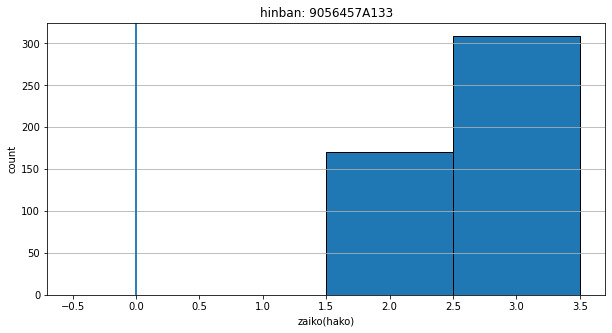

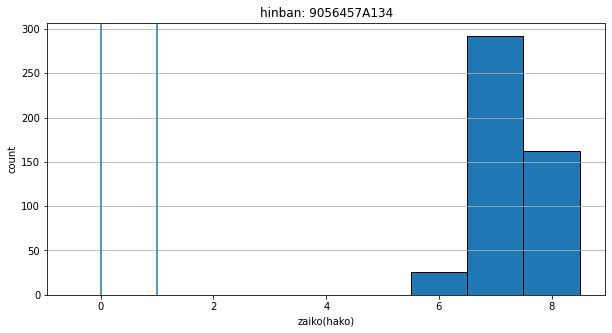

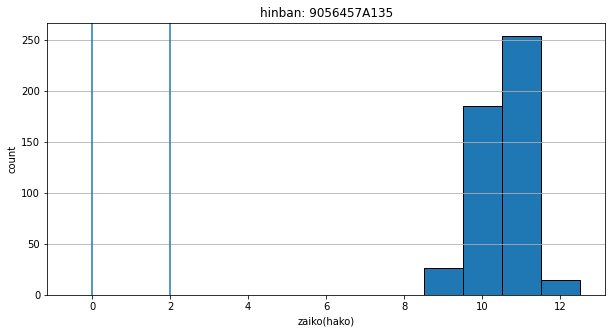

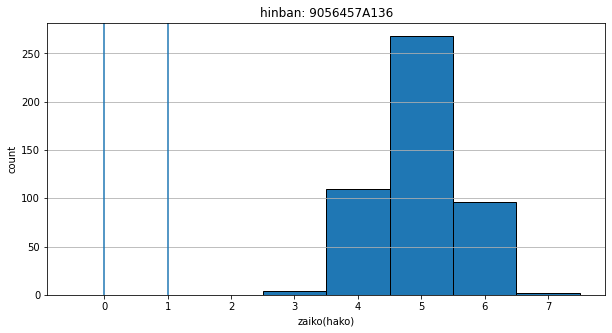

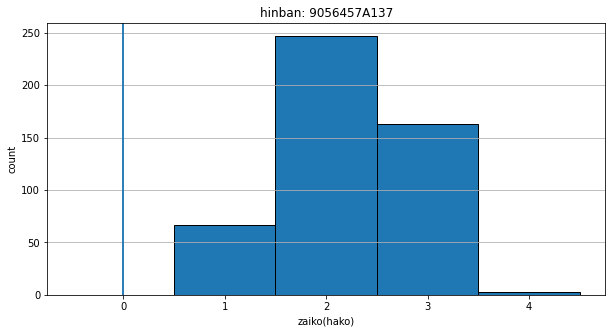

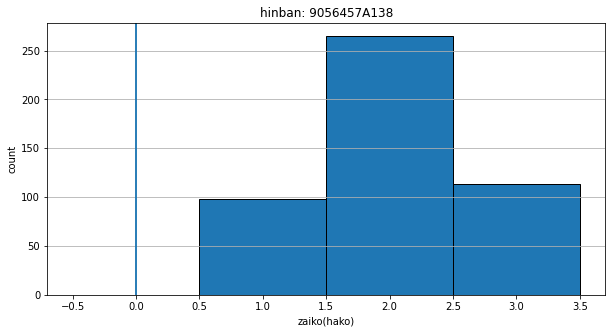

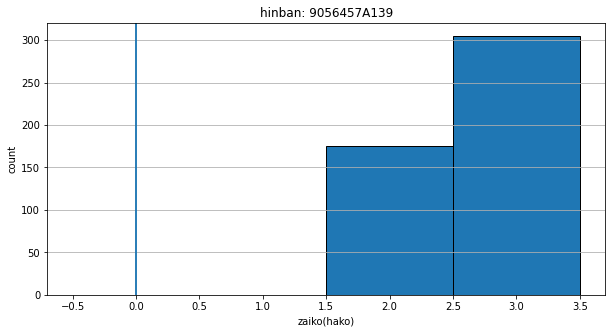

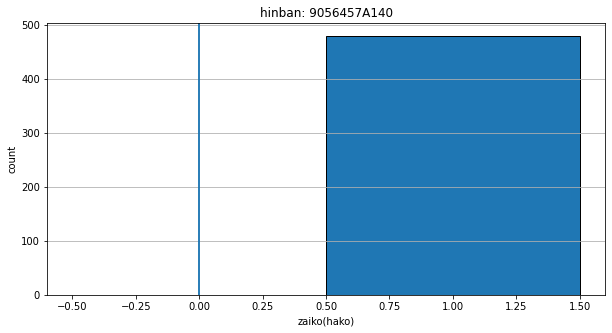

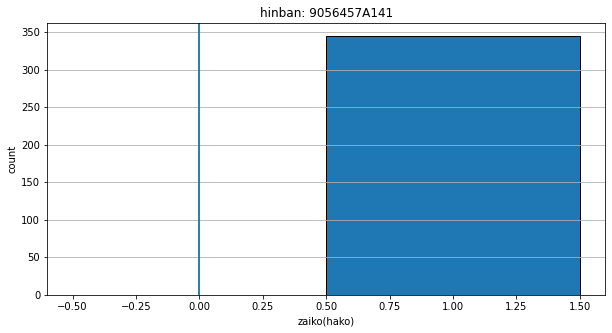

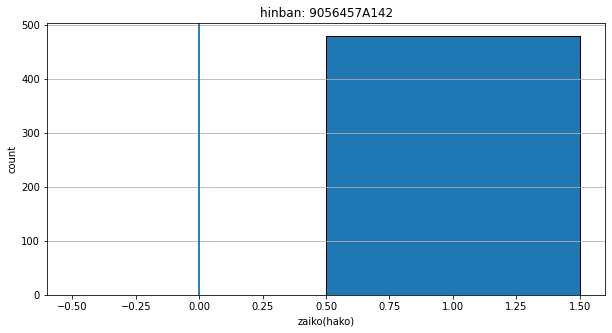

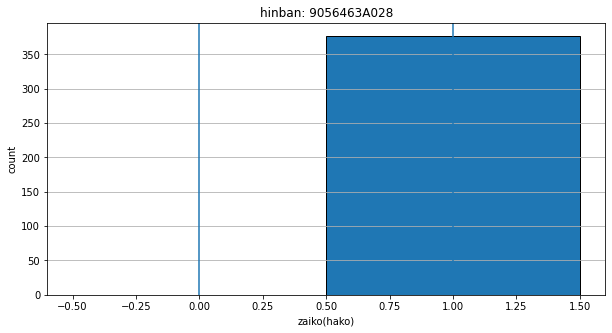

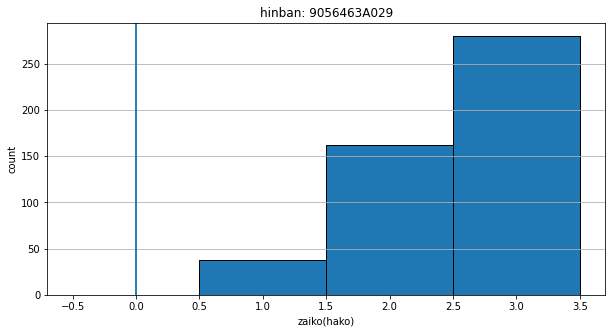

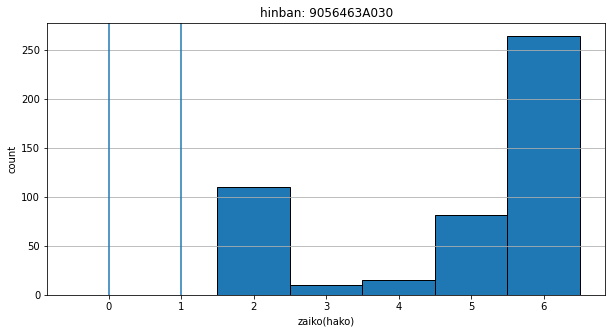

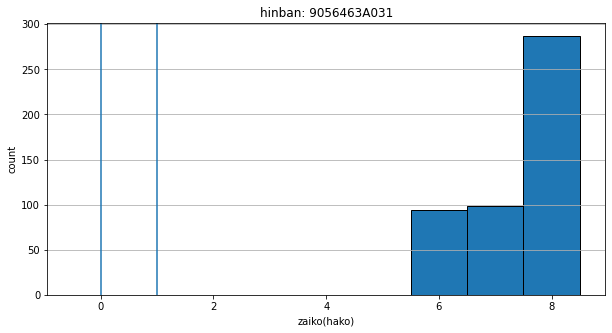

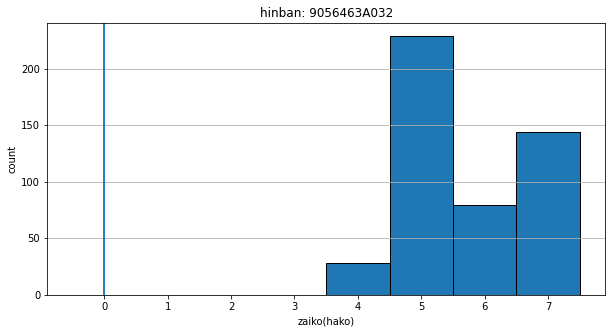

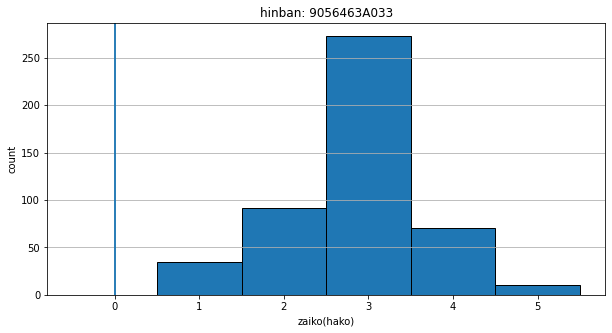

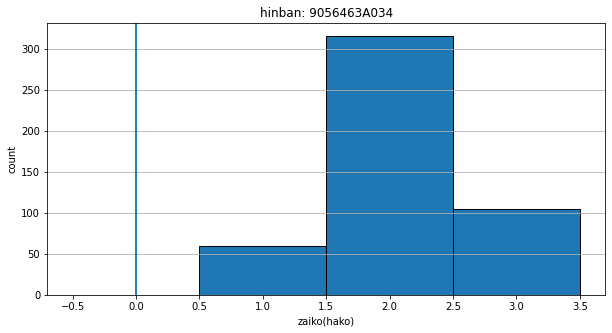

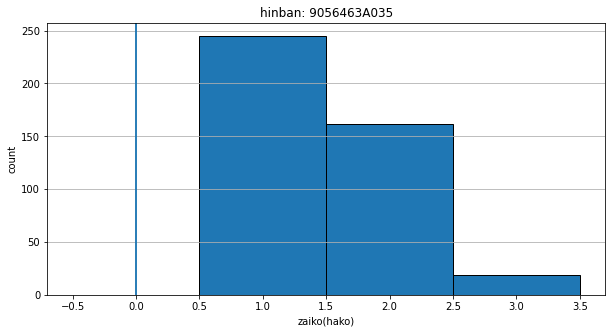

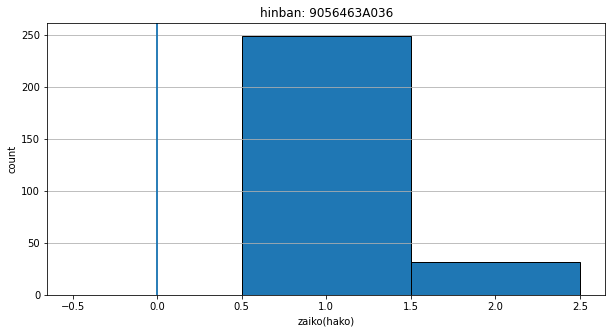

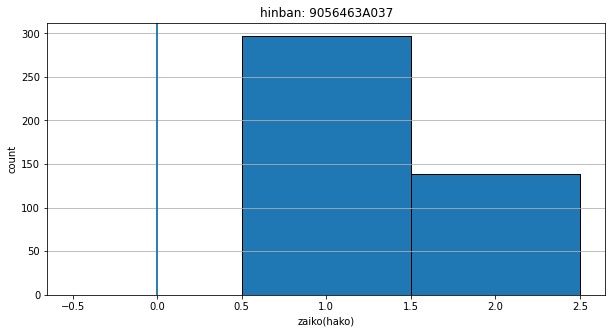

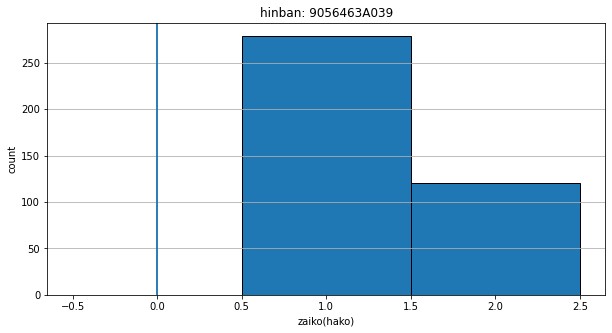

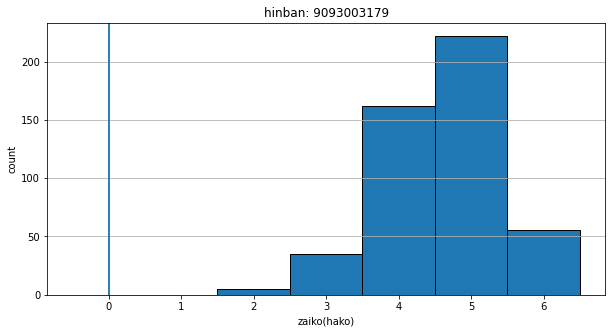

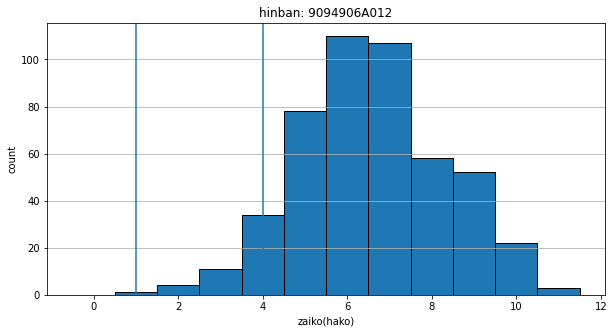

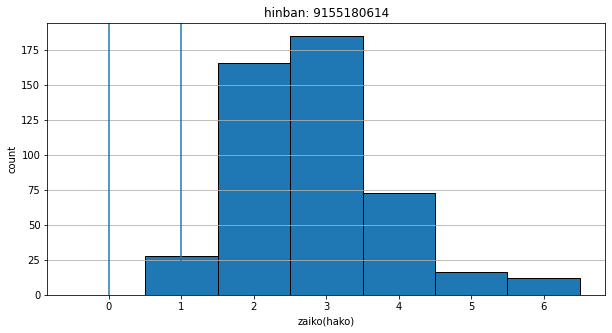

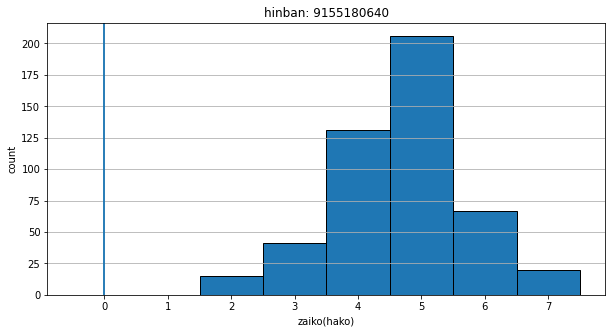

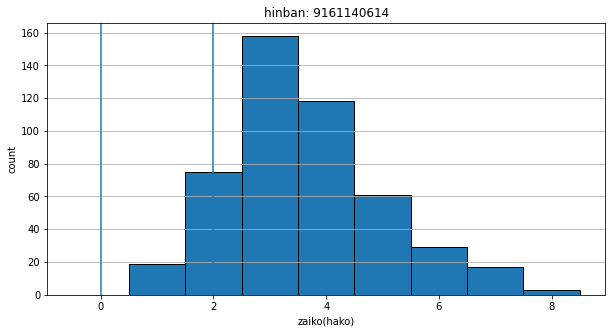

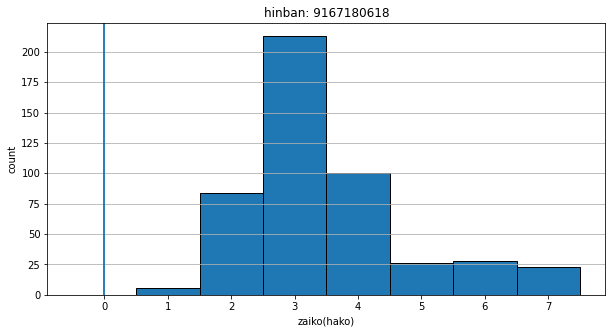

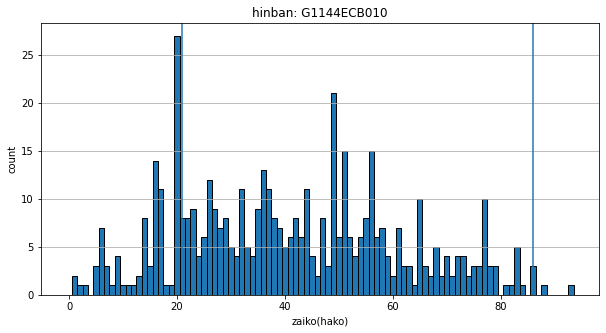

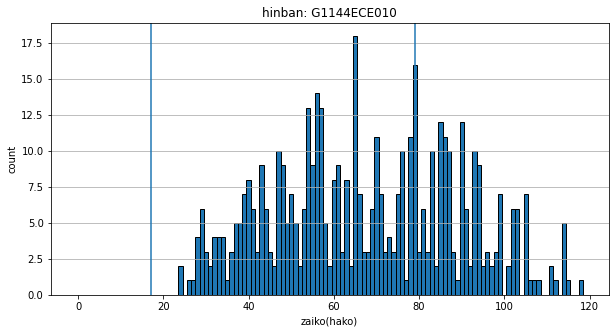

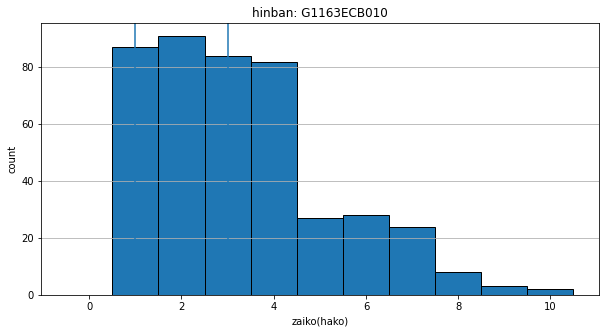

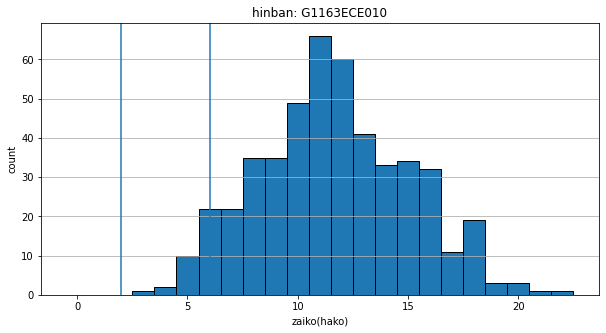

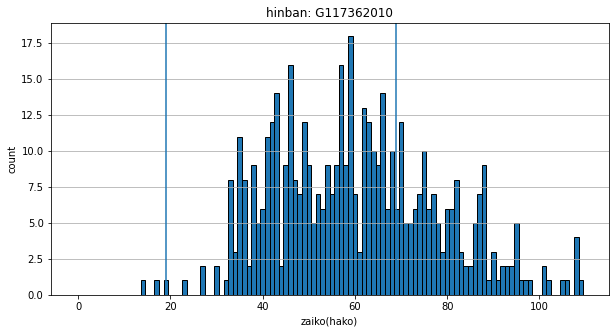

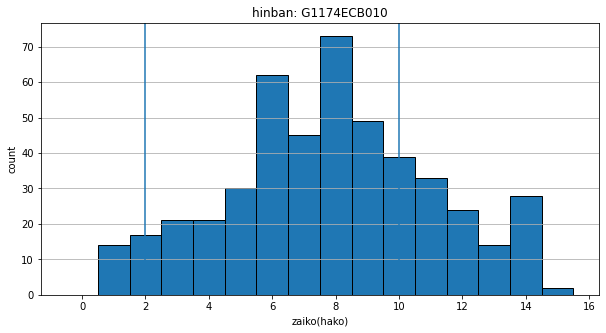

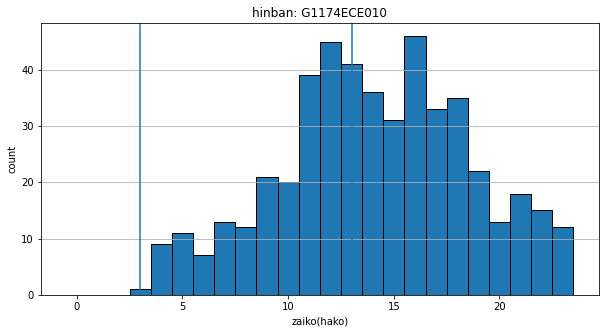

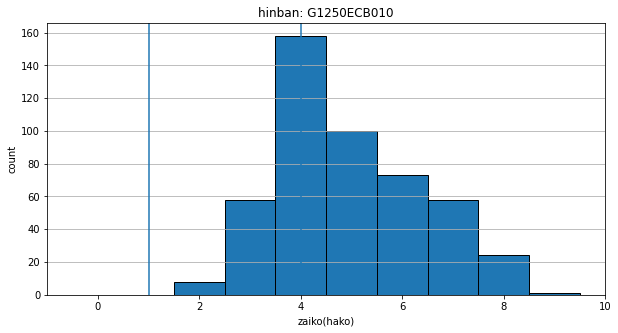

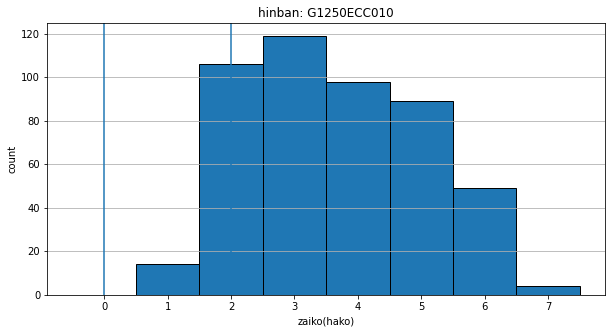

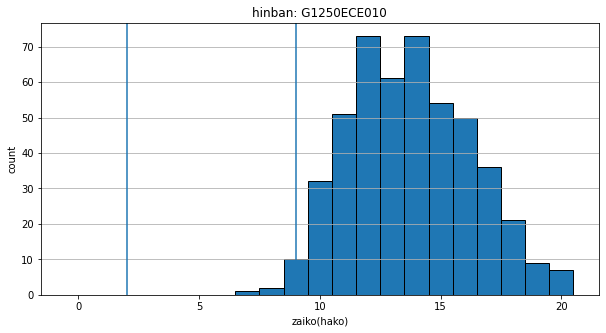

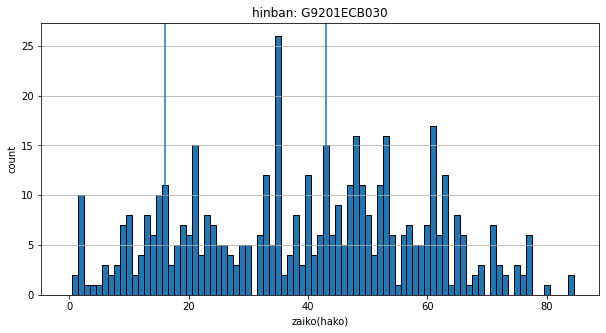

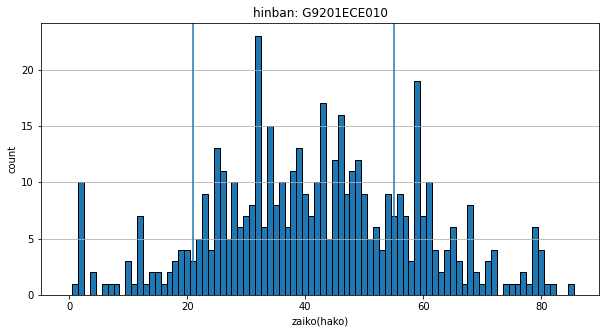

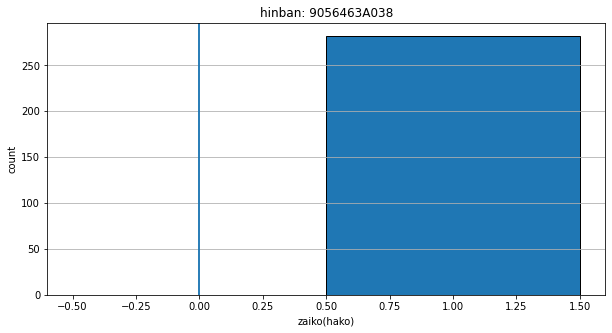

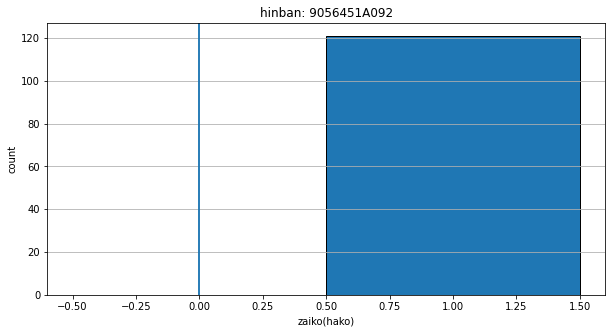

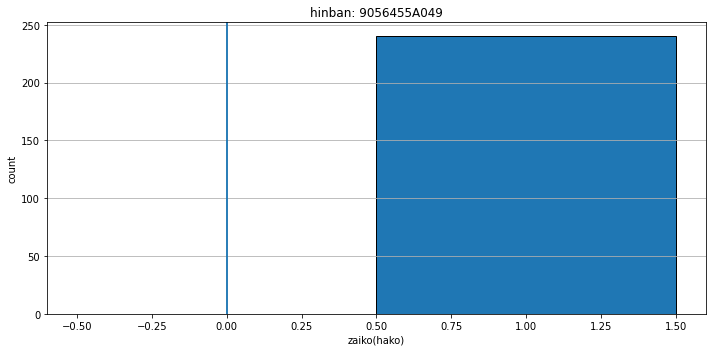

In [18]:
import matplotlib.pyplot as plt

# Display histograms for the first few products
#fig, axes = plt.subplots(min(5, len(histograms)), 1, figsize=(10, 15))

for idx, (product, (hist, bins)) in enumerate(list(histograms.items())):
    #product = "G1144ECB010"  
    product2 = product.replace("-", "") 
    product3 = product2.replace(" ", "") 
    for i in range(len(df_merge.iloc[:,1])):
        hinban = df_merge.loc[i,"品番"]
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban2.replace(" ", "") 
        if product3 == hinban3:
            #if product3 == "33490ECB010":
            if (df_merge.loc[i,"最小値"] != "Nan") and not np.isnan(df_merge.loc[i,"最大値"]) :
                fig = plt.figure(figsize=[10,5])
                ax = fig.add_subplot(111)
                #ax = axes[idx]
                ax.bar(bins[:-1], hist, width=1, align='center', edgecolor='black')
                ax.axvline(x=int(df_merge.loc[i,"最小値"]))
                ax.axvline(x=int(df_merge.loc[i,"最大値"]))
                ax.set_title(f'hinban: {product.strip()}')
                ax.set_xlabel('zaiko(hako)')
                ax.set_ylabel('count')
                ax.grid(axis='y')
                #plt.show()
                filename = 'result/{0}_B{1}.png'.format(product3,int(df_merge.loc[i,"B"]))
                plt.savefig(filename)


plt.tight_layout()
plt.show()

In [69]:
data = pd.merge(df_merge, histograms, on='品番', how='left')
data.head()

TypeError: Can only merge Series or DataFrame objects, a <class 'dict'> was passed

In [22]:
# Calculate the ratios of values exceeding 80% and below 20% of the maximum value for each product number's histogram
min_ratios = {}
max_ratios = {}

new_below_20_ratios = {}
new_exceeding_80_ratios_updated = {}

for product, (hist, bins) in histograms.items():
    product2 = product.replace("-", "") 
    product3 = product2.replace(" ", "") 
    for i in range(len(df_merge.iloc[:,1])):
        hinban = df_merge.loc[i,"品番"]
        hinban2 = hinban.replace("-", "") 
        hinban3 = hinban2.replace(" ", "") 
        if product3 == hinban3:
            #print(hinban3)
            threshold_80 = df_merge.loc[i,"最大値"]
            threshold_20 = df_merge.loc[i,"最小値"]
    
            total_count = hist.sum()

            exceeding_80_ratio = np.sum(hist[bins[:-1] > threshold_80]) / total_count if total_count > 0 else 0
            below_20_ratio = np.sum(hist[bins[:-1] < threshold_20]) / total_count if total_count > 0 else 0

            #print(exceeding_80_ratio)
            
            new_exceeding_80_ratios_updated[product] = exceeding_80_ratio
            new_below_20_ratios[product] = below_20_ratio

# Convert dictionaries to DataFrame for better visualization
df_kari = pd.DataFrame({
    '品番': list(new_exceeding_80_ratios_updated.keys()),
    '設計値MAXを超える割合': list(new_exceeding_80_ratios_updated.values()),
    '設計値MINを下回る割合': list(new_below_20_ratios.values())
})

# Display the DataFrame
df_kari.head(100)

with open('..//data/順立装置の在庫.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    df_kari.to_csv(f)

/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater


In [83]:
histgrams

NameError: name 'histgrams' is not defined

In [84]:
histograms

{'019120LC030    ': (array([  0,   0,   0,   0,   0,   0,   0,   3,  25,  59,  84,  66,  69,
         117,  45,  10,   2]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17])),
 '019120LC040    ': (array([ 0, 25, 28, 78, 26]), array([0, 1, 2, 3, 4, 5])),
 '019120LC050    ': (array([  0,   0,   0,  32,  77, 225, 146]),
  array([0, 1, 2, 3, 4, 5, 6, 7])),
 '019120LC060    ': (array([  0,   0,   0,   0,   0,   0,   2,  80, 172, 166,  50,   7,   3]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])),
 '019120LC070    ': (array([  0,   0,   0,   0,   0,   0,  12,  99, 210, 128,  31]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])),
 '019128GA010    ': (array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  6,  6,  3,  4, 10,  9, 25,
         22, 19, 32, 32, 41, 37, 37, 31, 37, 22, 25, 13, 10, 16,  9, 14,  8,
          4,  2,  2,  1]),
  array([ 0,  1,  2